In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.RBOB)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,XB,-60881.0,128882.0,189763.0,36136.0,80365.0,44229.0,-3291.0,285.0,...,39197.0,-192059.0,-147137.0,100858.0,-18.62,3.5,-18.76,2.69,-18.46,2.1
808,2025-07-01,XB,-59728.0,120966.0,180694.0,30518.0,78539.0,48021.0,1153.0,-3291.0,...,-192059.0,NaN,100858.0,NaN,3.50,NaN,2.69,NaN,2.10,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean    -103381.037083
std       24043.598793
min     -174838.000000
25%     -118477.000000
50%     -103276.000000
75%      -86819.000000
max      -29531.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       809.000000
mean      62526.234858
std       19039.286552
min       11588.000000
25%       49026.000000
50%       61496.000000
75%       74912.000000
max      129000.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("rbob_cot_mm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'ManagedMoney_NetPosition_change': ['prior_cumulative_5D_F1_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_LongPosition_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_AGG_OI_change',
  'F2_RolledPrice_change'],
 'ManagedMoney_ShortPosition_change': ['F3_RolledPrice_change',
  'prior_report_ManagedMoney_ShortPosition_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_AGG_OI_change'],
 'ManagedMoney_NetPosition_to_openinterest_change': ['prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change',
  'prior_5D_F2_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_to_openinterest_change': ['prior_cumulat

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-21 13:33:58,470] A new study created in memory with name: no-name-5e907c60-54c8-479b-a527-738d3c6b2302
Best trial: 0. Best value: 0.349205:   1%|       | 1/80 [00:01<01:52,  1.43s/it]

[I 2025-08-21 13:33:59,907] Trial 0 finished with value: 0.3492051226936622 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.3492051226936622.
[I 2025-08-21 13:33:59,939] Trial 1 finished with value: 0.34918496630423485 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.3492051226936622.


Best trial: 2. Best value: 0.407308:   4%|▎      | 3/80 [00:05<02:22,  1.85s/it]

[I 2025-08-21 13:34:03,906] Trial 2 finished with value: 0.4073077559646394 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4073077559646394.


Best trial: 2. Best value: 0.407308:   9%|▌      | 7/80 [00:05<00:40,  1.82it/s]

[I 2025-08-21 13:34:04,179] Trial 3 finished with value: 0.38320829759657227 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.4073077559646394.
[I 2025-08-21 13:34:04,222] Trial 4 finished with value: 0.3491853107376581 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.4073077559646394.
[I 2025-08-21 13:34:04,253] Trial 5 finished with value: 0.349184965982333 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4073077559646394.
[I 2025-08-21 13:34:04,295] Trial 6 finished with value: 0.3246180516795504 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.4073077559646394.
[I 2025-08-21 13:34:04,339] Trial 7 finished with value: 0.349184965982333 and parame

Best trial: 2. Best value: 0.407308:  11%|▊      | 9/80 [00:06<00:29,  2.42it/s]

[I 2025-08-21 13:34:04,641] Trial 8 finished with value: 0.4007206772109232 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.4073077559646394.
[I 2025-08-21 13:34:04,684] Trial 9 finished with value: 0.349184965982333 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4073077559646394.


Best trial: 10. Best value: 0.407332:  14%|▋    | 11/80 [00:10<01:04,  1.06it/s]

[I 2025-08-21 13:34:08,554] Trial 10 finished with value: 0.40733150211655705 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.40733150211655705.


Best trial: 11. Best value: 0.407332:  15%|▊    | 12/80 [00:13<01:41,  1.49s/it]

[I 2025-08-21 13:34:12,291] Trial 11 finished with value: 0.40733150211655716 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 11 with value: 0.40733150211655716.


Best trial: 11. Best value: 0.407332:  16%|▊    | 13/80 [00:17<02:13,  1.99s/it]

[I 2025-08-21 13:34:16,071] Trial 12 finished with value: 0.40733150211655705 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 11 with value: 0.40733150211655716.


Best trial: 11. Best value: 0.407332:  18%|▉    | 14/80 [00:19<02:11,  1.99s/it]

[I 2025-08-21 13:34:18,085] Trial 13 finished with value: 0.4042356891647999 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.40733150211655716.


Best trial: 14. Best value: 0.409658:  19%|▉    | 15/80 [00:26<03:38,  3.36s/it]

[I 2025-08-21 13:34:25,444] Trial 14 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40965762337525646.


Best trial: 14. Best value: 0.409658:  20%|█    | 16/80 [00:33<04:37,  4.33s/it]

[I 2025-08-21 13:34:32,468] Trial 15 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40965762337525646.


Best trial: 14. Best value: 0.409658:  22%|█▏   | 18/80 [00:41<05:15,  5.09s/it]

[I 2025-08-21 13:34:39,564] Trial 16 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40965762337525646.
[I 2025-08-21 13:34:39,608] Trial 17 finished with value: 0.34916285133075275 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.40965762337525646.
[I 2025-08-21 13:34:39,639] Trial 18 finished with value: 0.3493490461110112 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.40965762337525646.


Best trial: 14. Best value: 0.409658:  25%|█▎   | 20/80 [00:45<03:04,  3.08s/it]

[I 2025-08-21 13:34:43,670] Trial 19 finished with value: 0.4027415836131333 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.40965762337525646.


Best trial: 14. Best value: 0.409658:  26%|█▎   | 21/80 [00:51<03:39,  3.71s/it]

[I 2025-08-21 13:34:49,848] Trial 20 finished with value: 0.4094748619765784 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40965762337525646.


Best trial: 14. Best value: 0.409658:  28%|█▍   | 22/80 [00:58<04:21,  4.52s/it]

[I 2025-08-21 13:34:57,106] Trial 21 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40965762337525646.


Best trial: 14. Best value: 0.409658:  29%|█▍   | 23/80 [01:04<04:39,  4.90s/it]

[I 2025-08-21 13:35:03,198] Trial 22 finished with value: 0.4094761789613031 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40965762337525646.


Best trial: 23. Best value: 0.409887:  30%|█▌   | 24/80 [01:06<03:42,  3.97s/it]

[I 2025-08-21 13:35:04,494] Trial 23 finished with value: 0.4098865497322393 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  31%|█▌   | 25/80 [01:07<02:59,  3.27s/it]

[I 2025-08-21 13:35:05,864] Trial 24 finished with value: 0.4094468378501043 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  32%|█▋   | 26/80 [01:08<02:27,  2.74s/it]

[I 2025-08-21 13:35:07,233] Trial 25 finished with value: 0.40696880693432436 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  35%|█▊   | 28/80 [01:16<02:30,  2.89s/it]

[I 2025-08-21 13:35:14,431] Trial 26 finished with value: 0.386541140916246 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.4098865497322393.
[I 2025-08-21 13:35:14,577] Trial 27 finished with value: 0.29360550061976304 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.4098865497322393.
[I 2025-08-21 13:35:14,611] Trial 28 finished with value: 0.34883676308359235 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  36%|█▊   | 29/80 [01:16<02:27,  2.89s/it]

[I 2025-08-21 13:35:14,645] Trial 29 finished with value: 0.34918496834484 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  39%|█▉   | 31/80 [01:17<01:15,  1.54s/it]

[I 2025-08-21 13:35:15,939] Trial 30 finished with value: 0.4048389882915129 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  40%|██   | 32/80 [01:24<02:09,  2.69s/it]

[I 2025-08-21 13:35:22,982] Trial 31 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  41%|██   | 33/80 [01:30<02:41,  3.44s/it]

[I 2025-08-21 13:35:28,926] Trial 32 finished with value: 0.4091306861853963 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 23. Best value: 0.409887:  42%|██▏  | 34/80 [01:40<03:48,  4.96s/it]

[I 2025-08-21 13:35:38,543] Trial 33 finished with value: 0.40922895250236807 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.4098865497322393.


Best trial: 34. Best value: 0.410555:  44%|██▏  | 35/80 [01:41<02:59,  4.00s/it]

[I 2025-08-21 13:35:39,810] Trial 34 finished with value: 0.41055490429037944 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  45%|██▎  | 36/80 [01:43<02:31,  3.44s/it]

[I 2025-08-21 13:35:41,761] Trial 35 finished with value: 0.4036917819781965 and parameters: {'model': 'hgbm', 'learning_rate': 0.001178109274707556, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.018312198090511655, 'max_leaf_nodes': 250}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  46%|██▎  | 37/80 [01:44<02:01,  2.82s/it]

[I 2025-08-21 13:35:42,959] Trial 36 finished with value: 0.4090307675878889 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021117159729040044, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.02287437210526344, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  48%|██▍  | 38/80 [01:46<01:50,  2.63s/it]

[I 2025-08-21 13:35:45,112] Trial 37 finished with value: 0.397256900256717 and parameters: {'model': 'hgbm', 'learning_rate': 0.006786929450457322, 'max_depth': 10, 'max_iter': 600, 'l2_regularization': 0.9653427925769207, 'max_leaf_nodes': 27}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:35:45,158] Trial 38 finished with value: 0.3473713014540398 and parameters: {'model': 'ridge', 'alpha': 968.0937508971867}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  50%|██▌  | 40/80 [01:48<01:13,  1.84s/it]

[I 2025-08-21 13:35:46,875] Trial 39 finished with value: 0.3953695082418314 and parameters: {'model': 'hgbm', 'learning_rate': 0.007967643091132468, 'max_depth': 7, 'max_iter': 600, 'l2_regularization': 0.36288253466319625, 'max_leaf_nodes': 191}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:35:46,911] Trial 40 finished with value: 0.34918496598413834 and parameters: {'model': 'lasso', 'alpha': 1.0661296476070576e-06}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  52%|██▋  | 42/80 [01:53<01:20,  2.11s/it]

[I 2025-08-21 13:35:51,924] Trial 41 finished with value: 0.40873108859120827 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:35:51,968] Trial 42 finished with value: 0.349184965982333 and parameters: {'model': 'ols'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  55%|██▊  | 44/80 [02:00<01:36,  2.68s/it]

[I 2025-08-21 13:35:59,342] Trial 43 finished with value: 0.4092388680450947 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  56%|██▊  | 45/80 [02:03<01:36,  2.75s/it]

[I 2025-08-21 13:36:02,360] Trial 44 finished with value: 0.39815581794596416 and parameters: {'model': 'hgbm', 'learning_rate': 0.0040913838981503125, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.61685306656061, 'max_leaf_nodes': 185}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  61%|███  | 49/80 [02:09<00:53,  1.72s/it]

[I 2025-08-21 13:36:07,724] Trial 45 finished with value: 0.4067373862734434 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:36:07,773] Trial 46 finished with value: 0.34916285204708236 and parameters: {'model': 'enet', 'alpha': 8.268722696555374e-06, 'l1_ratio': 0.9872734857529787, 'loss': 'squared_error'}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:36:07,816] Trial 47 finished with value: 0.3492662644333206 and parameters: {'model': 'ridge', 'alpha': 12.61778927924657}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:36:07,860] Trial 48 finished with value: 0.349184965982333 and parameters: {'model': 'ols'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  62%|███▏ | 50/80 [02:12<00:58,  1.93s/it]

[I 2025-08-21 13:36:10,702] Trial 49 finished with value: 0.4082221034380908 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  64%|███▏ | 51/80 [02:15<01:04,  2.23s/it]

[I 2025-08-21 13:36:14,047] Trial 50 finished with value: 0.4008515817100416 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  65%|███▎ | 52/80 [02:23<01:36,  3.46s/it]

[I 2025-08-21 13:36:21,536] Trial 51 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  66%|███▎ | 53/80 [02:30<02:00,  4.45s/it]

[I 2025-08-21 13:36:28,958] Trial 52 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  68%|███▍ | 54/80 [02:37<02:14,  5.17s/it]

[I 2025-08-21 13:36:36,126] Trial 53 finished with value: 0.4092388680450946 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  69%|███▍ | 55/80 [02:44<02:23,  5.75s/it]

[I 2025-08-21 13:36:43,433] Trial 54 finished with value: 0.40965653146512965 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  70%|███▌ | 56/80 [02:50<02:19,  5.80s/it]

[I 2025-08-21 13:36:49,374] Trial 55 finished with value: 0.4091306861853963 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  71%|███▌ | 57/80 [02:52<01:45,  4.58s/it]

[I 2025-08-21 13:36:50,889] Trial 56 finished with value: 0.3226305118317415 and parameters: {'model': 'hgbm', 'learning_rate': 0.2700099884412453, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.31214445474944374, 'max_leaf_nodes': 181}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  72%|███▋ | 58/80 [02:59<01:57,  5.36s/it]

[I 2025-08-21 13:36:58,160] Trial 57 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:36:58,206] Trial 58 finished with value: 0.3491849680161932 and parameters: {'model': 'lasso', 'alpha': 0.0007740437742917801}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  75%|███▊ | 60/80 [03:02<01:10,  3.53s/it]

[I 2025-08-21 13:37:00,814] Trial 59 finished with value: 0.4077847844016584 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:37:00,865] Trial 60 finished with value: 0.29534432469766814 and parameters: {'model': 'enet', 'alpha': 9.995963722322353e-06, 'l1_ratio': 0.5666006271531584, 'loss': 'huber', 'epsilon': 0.14253506885642742}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  78%|███▉ | 62/80 [03:09<01:04,  3.60s/it]

[I 2025-08-21 13:37:08,235] Trial 61 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  79%|███▉ | 63/80 [03:17<01:16,  4.52s/it]

[I 2025-08-21 13:37:16,023] Trial 62 finished with value: 0.4092388680450947 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  80%|████ | 64/80 [03:25<01:24,  5.28s/it]

[I 2025-08-21 13:37:23,734] Trial 63 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  81%|████ | 65/80 [03:31<01:23,  5.57s/it]

[I 2025-08-21 13:37:30,164] Trial 64 finished with value: 0.40821299423835267 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  82%|████▏| 66/80 [03:39<01:26,  6.16s/it]

[I 2025-08-21 13:37:37,935] Trial 65 finished with value: 0.4092388680450946 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  84%|████▏| 67/80 [03:41<01:06,  5.15s/it]

[I 2025-08-21 13:37:40,432] Trial 66 finished with value: 0.40485053752988515 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  85%|████▎| 68/80 [03:49<01:11,  5.95s/it]

[I 2025-08-21 13:37:48,433] Trial 67 finished with value: 0.39991209058983057 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  88%|████▍| 70/80 [03:51<00:46,  4.68s/it]

[I 2025-08-21 13:37:49,949] Trial 68 finished with value: 0.37628806307542584 and parameters: {'model': 'hgbm', 'learning_rate': 0.02040101108673506, 'max_depth': 14, 'max_iter': 400, 'l2_regularization': 0.2073071779763391, 'max_leaf_nodes': 59}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:37:49,994] Trial 69 finished with value: 0.349184965982333 and parameters: {'model': 'ols'}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:37:50,040] Trial 70 finished with value: 0.34918569693482227 and parameters: {'model': 'ridge', 'alpha': 0.10167098425923696}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  90%|████▌| 72/80 [03:59<00:28,  3.51s/it]

[I 2025-08-21 13:37:57,638] Trial 71 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  91%|████▌| 73/80 [04:06<00:29,  4.28s/it]

[I 2025-08-21 13:38:04,848] Trial 72 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  92%|████▋| 74/80 [04:12<00:28,  4.73s/it]

[I 2025-08-21 13:38:11,089] Trial 73 finished with value: 0.4094761789613031 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  94%|████▋| 75/80 [04:19<00:26,  5.37s/it]

[I 2025-08-21 13:38:18,425] Trial 74 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  95%|████▊| 76/80 [04:28<00:24,  6.20s/it]

[I 2025-08-21 13:38:26,981] Trial 75 finished with value: 0.40923922717117656 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:38:27,027] Trial 76 finished with value: 0.34918497606667237 and parameters: {'model': 'lasso', 'alpha': 0.004589401284313302}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555:  98%|████▉| 78/80 [04:35<00:10,  5.09s/it]

[I 2025-08-21 13:38:34,181] Trial 77 finished with value: 0.40965762337525646 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 34 with value: 0.41055490429037944.


Best trial: 34. Best value: 0.410555: 100%|█████| 80/80 [04:38<00:00,  3.48s/it]
[I 2025-08-21 13:38:37,042] A new study created in memory with name: no-name-312d325e-454a-4af8-a3f1-091858754f17


[I 2025-08-21 13:38:36,984] Trial 78 finished with value: 0.39846695385207365 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010050450896186237, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.8825517459768294, 'max_leaf_nodes': 217}. Best is trial 34 with value: 0.41055490429037944.
[I 2025-08-21 13:38:37,034] Trial 79 finished with value: 0.3491630862955316 and parameters: {'model': 'enet', 'alpha': 0.0001292331610928001, 'l1_ratio': 0.5965888981737316, 'loss': 'squared_error'}. Best is trial 34 with value: 0.41055490429037944.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}

Best Per Model:
lasso: score=0.3492, params={'model': 'lasso', 'alpha': 1.0661296476070576e-06}
ridge: score=0.3474, params={'model': 'ridge', 'alpha': 968.0937508971867}
rf: score=0.3865, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf':

Best trial: 1. Best value: 0.49372:   1%|        | 1/80 [00:00<00:05, 13.58it/s]

[I 2025-08-21 13:38:37,084] Trial 0 finished with value: 0.49371457146314274 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.49371457146314274.
[I 2025-08-21 13:38:37,115] Trial 1 finished with value: 0.4937197325765489 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.4937197325765489.


Best trial: 2. Best value: 0.525007:   4%|▎      | 3/80 [00:03<01:37,  1.26s/it]

[I 2025-08-21 13:38:40,821] Trial 2 finished with value: 0.5250065651215257 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5250065651215257.


Best trial: 2. Best value: 0.525007:   9%|▌      | 7/80 [00:04<00:30,  2.40it/s]

[I 2025-08-21 13:38:41,100] Trial 3 finished with value: 0.5052992475239784 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5250065651215257.
[I 2025-08-21 13:38:41,131] Trial 4 finished with value: 0.4937209152394811 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5250065651215257.
[I 2025-08-21 13:38:41,163] Trial 5 finished with value: 0.4937197314711486 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5250065651215257.
[I 2025-08-21 13:38:41,207] Trial 6 finished with value: 0.4270498441244712 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5250065651215257.
[I 2025-08-21 13:38:41,251] Trial 7 finished with value: 0.4937197314711486 and param

Best trial: 8. Best value: 0.526558:  11%|▊      | 9/80 [00:04<00:23,  2.98it/s]

[I 2025-08-21 13:38:41,587] Trial 8 finished with value: 0.5265578666126791 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.5265578666126791.
[I 2025-08-21 13:38:41,619] Trial 9 finished with value: 0.4937197314711486 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  14%|▊     | 11/80 [00:04<00:17,  3.83it/s]

[I 2025-08-21 13:38:41,813] Trial 10 finished with value: 0.4566719120548598 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  15%|▉     | 12/80 [00:08<01:03,  1.07it/s]

[I 2025-08-21 13:38:45,557] Trial 11 finished with value: 0.5250034789918652 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  16%|▉     | 13/80 [00:09<01:07,  1.01s/it]

[I 2025-08-21 13:38:46,812] Trial 12 finished with value: 0.5152556577138502 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  18%|█     | 14/80 [00:18<03:12,  2.92s/it]

[I 2025-08-21 13:38:55,906] Trial 13 finished with value: 0.5171702955927007 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  19%|█▏    | 15/80 [00:24<03:58,  3.68s/it]

[I 2025-08-21 13:39:01,817] Trial 14 finished with value: 0.5241124681858856 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  20%|█▏    | 16/80 [00:27<03:35,  3.37s/it]

[I 2025-08-21 13:39:04,323] Trial 15 finished with value: 0.45483595592295806 and parameters: {'model': 'hgbm', 'learning_rate': 0.04669207840693148, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.2579396418255043, 'max_leaf_nodes': 237}. Best is trial 8 with value: 0.5265578666126791.
[I 2025-08-21 13:39:04,369] Trial 16 finished with value: 0.4937197314481325 and parameters: {'model': 'lasso', 'alpha': 2.8240880653431724e-06}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  22%|█▎    | 18/80 [00:28<02:09,  2.10s/it]

[I 2025-08-21 13:39:05,168] Trial 17 finished with value: 0.5232239110348393 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5265578666126791.
[I 2025-08-21 13:39:05,216] Trial 18 finished with value: 0.49389559113085235 and parameters: {'model': 'enet', 'alpha': 0.00016324584208742617, 'l1_ratio': 0.9533430150164188, 'loss': 'squared_error'}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  25%|█▌    | 20/80 [00:33<02:17,  2.30s/it]

[I 2025-08-21 13:39:10,407] Trial 19 finished with value: 0.52455554406535 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  26%|█▌    | 21/80 [00:34<02:05,  2.13s/it]

[I 2025-08-21 13:39:11,920] Trial 20 finished with value: 0.5255055427760681 and parameters: {'model': 'hgbm', 'learning_rate': 0.007426116718087666, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.9880365245578047, 'max_leaf_nodes': 92}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 8. Best value: 0.526558:  28%|█▋    | 22/80 [00:36<01:57,  2.02s/it]

[I 2025-08-21 13:39:13,580] Trial 21 finished with value: 0.5255245358491283 and parameters: {'model': 'hgbm', 'learning_rate': 0.006631488447557935, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.8405371917283121, 'max_leaf_nodes': 91}. Best is trial 8 with value: 0.5265578666126791.


Best trial: 22. Best value: 0.527978:  29%|█▍   | 23/80 [00:37<01:45,  1.85s/it]

[I 2025-08-21 13:39:14,924] Trial 22 finished with value: 0.5279778566213987 and parameters: {'model': 'hgbm', 'learning_rate': 0.007015538296725006, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.9939553231150238, 'max_leaf_nodes': 89}. Best is trial 22 with value: 0.5279778566213987.


Best trial: 23. Best value: 0.532136:  30%|█▌   | 24/80 [00:38<01:29,  1.59s/it]

[I 2025-08-21 13:39:15,793] Trial 23 finished with value: 0.5321364577813628 and parameters: {'model': 'hgbm', 'learning_rate': 0.013442823728417555, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.9990132691058121, 'max_leaf_nodes': 78}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  31%|█▌   | 25/80 [00:39<01:13,  1.33s/it]

[I 2025-08-21 13:39:16,443] Trial 24 finished with value: 0.5308961308333091 and parameters: {'model': 'hgbm', 'learning_rate': 0.02138846243489512, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.4497157322085916, 'max_leaf_nodes': 56}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  32%|█▋   | 26/80 [00:39<00:59,  1.10s/it]

[I 2025-08-21 13:39:16,959] Trial 25 finished with value: 0.5296746655542139 and parameters: {'model': 'hgbm', 'learning_rate': 0.015706327357998155, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.5891210368900286, 'max_leaf_nodes': 29}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  34%|█▋   | 27/80 [00:40<00:49,  1.07it/s]

[I 2025-08-21 13:39:17,469] Trial 26 finished with value: 0.5304148567158746 and parameters: {'model': 'hgbm', 'learning_rate': 0.021040211012700722, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.5274012130982345, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  35%|█▊   | 28/80 [00:41<00:48,  1.08it/s]

[I 2025-08-21 13:39:18,372] Trial 27 finished with value: 0.4975555369769599 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011475118521582942, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.4041687542361626, 'max_leaf_nodes': 44}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  36%|█▊   | 29/80 [00:42<00:49,  1.03it/s]

[I 2025-08-21 13:39:19,452] Trial 28 finished with value: 0.5172540414389603 and parameters: {'model': 'hgbm', 'learning_rate': 0.022101031754635223, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.5145862649190932, 'max_leaf_nodes': 54}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  38%|█▉   | 30/80 [00:43<00:53,  1.08s/it]

[I 2025-08-21 13:39:20,778] Trial 29 finished with value: 0.43351051748418135 and parameters: {'model': 'hgbm', 'learning_rate': 0.2578113394310142, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.7345798081017254, 'max_leaf_nodes': 168}. Best is trial 23 with value: 0.5321364577813628.
[I 2025-08-21 13:39:20,813] Trial 30 finished with value: 0.49368612893447755 and parameters: {'model': 'lasso', 'alpha': 6.12680484014336}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  40%|██   | 32/80 [00:44<00:32,  1.46it/s]

[I 2025-08-21 13:39:21,224] Trial 31 finished with value: 0.5277063932886485 and parameters: {'model': 'hgbm', 'learning_rate': 0.014692904777639564, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.5498048117574993, 'max_leaf_nodes': 16}. Best is trial 23 with value: 0.5321364577813628.
[I 2025-08-21 13:39:21,270] Trial 32 finished with value: 0.4947922988776617 and parameters: {'model': 'ridge', 'alpha': 435.25613210920903}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  42%|██▏  | 34/80 [00:44<00:23,  1.98it/s]

[I 2025-08-21 13:39:21,684] Trial 33 finished with value: 0.5282297203158288 and parameters: {'model': 'hgbm', 'learning_rate': 0.016085038035671673, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.6231950171128886, 'max_leaf_nodes': 58}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 23. Best value: 0.532136:  44%|██▏  | 35/80 [00:45<00:25,  1.78it/s]

[I 2025-08-21 13:39:22,442] Trial 34 finished with value: 0.5080485394007926 and parameters: {'model': 'hgbm', 'learning_rate': 0.0371986397870493, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.416320363830743, 'max_leaf_nodes': 45}. Best is trial 23 with value: 0.5321364577813628.


Best trial: 35. Best value: 0.532987:  45%|██▎  | 36/80 [00:46<00:25,  1.70it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-21 13:39:23,121] Trial 35 finished with value: 0.5329866032014288 and parameters: {'model': 'hgbm', 'learning_rate': 0.013792287485343474, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.812275759601539, 'max_leaf_nodes': 16}. Best is trial 35 with value: 0.5329866032014288.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-21 13:39:23,653] Trial 36 finished with value: 0.4770087123555448 and parameters: {'model': 'enet', 'alpha': 1.5694693552351432e-06, 'l1_ratio': 0.09443475551091396, 'loss': 'huber', 'epsilon': 0.19982846239142282}. Best is trial 35 with value: 0.5329866032014288.
[I 2025-08-21 13:39:23,689] Trial 37 finished with value: 0.49487191721085666 and parameters: {'model': 'ridge', 'alpha': 390.04913258731585}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  49%|██▍  | 39/80 [00:50<00:47,  1.16s/it]

[I 2025-08-21 13:39:27,562] Trial 38 finished with value: 0.5239330687732378 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.5329866032014288.
[I 2025-08-21 13:39:27,609] Trial 39 finished with value: 0.49371972770081446 and parameters: {'model': 'lasso', 'alpha': 0.0004913855979554176}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  51%|██▌  | 41/80 [00:51<00:36,  1.06it/s]

[I 2025-08-21 13:39:28,758] Trial 40 finished with value: 0.5305627086948773 and parameters: {'model': 'hgbm', 'learning_rate': 0.011814566265509866, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.830727298111273, 'max_leaf_nodes': 15}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  52%|██▋  | 42/80 [00:52<00:38,  1.01s/it]

[I 2025-08-21 13:39:30,013] Trial 41 finished with value: 0.5310008167613591 and parameters: {'model': 'hgbm', 'learning_rate': 0.011094761373341236, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.8958582637054376, 'max_leaf_nodes': 16}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  54%|██▋  | 43/80 [00:54<00:41,  1.12s/it]

[I 2025-08-21 13:39:31,490] Trial 42 finished with value: 0.5260231400382583 and parameters: {'model': 'hgbm', 'learning_rate': 0.00999223669613101, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.8658709054809232, 'max_leaf_nodes': 60}. Best is trial 35 with value: 0.5329866032014288.
[I 2025-08-21 13:39:31,524] Trial 43 finished with value: 0.4937197314711486 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  56%|██▊  | 45/80 [00:55<00:32,  1.07it/s]

[I 2025-08-21 13:39:32,805] Trial 44 finished with value: 0.5302430129379767 and parameters: {'model': 'hgbm', 'learning_rate': 0.010498659192495107, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.8686207526566074, 'max_leaf_nodes': 19}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  57%|██▉  | 46/80 [00:56<00:33,  1.01it/s]

[I 2025-08-21 13:39:33,970] Trial 45 finished with value: 0.526292583360192 and parameters: {'model': 'hgbm', 'learning_rate': 0.0036578351692242617, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.7924191963027247, 'max_leaf_nodes': 64}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  60%|███  | 48/80 [00:58<00:37,  1.17s/it]

[I 2025-08-21 13:39:35,710] Trial 46 finished with value: 0.48920570779532035 and parameters: {'model': 'hgbm', 'learning_rate': 0.026761489585064385, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.9278950016818585, 'max_leaf_nodes': 36}. Best is trial 35 with value: 0.5329866032014288.
[I 2025-08-21 13:39:35,754] Trial 47 finished with value: 0.49390151133894544 and parameters: {'model': 'ridge', 'alpha': 7.995887715185922}. Best is trial 35 with value: 0.5329866032014288.
[I 2025-08-21 13:39:35,785] Trial 48 finished with value: 0.4937197314711486 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 35. Best value: 0.532987:  62%|███▏ | 50/80 [00:59<00:23,  1.27it/s]

[I 2025-08-21 13:39:36,964] Trial 49 finished with value: 0.528952968914135 and parameters: {'model': 'hgbm', 'learning_rate': 0.004308863584188335, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.7506279023340253, 'max_leaf_nodes': 74}. Best is trial 35 with value: 0.5329866032014288.
[I 2025-08-21 13:39:37,012] Trial 50 finished with value: 0.493895494423971 and parameters: {'model': 'enet', 'alpha': 1.2982876596300143e-05, 'l1_ratio': 0.987936794093933, 'loss': 'squared_error'}. Best is trial 35 with value: 0.5329866032014288.


Best trial: 51. Best value: 0.533165:  65%|███▎ | 52/80 [01:00<00:18,  1.53it/s]

[I 2025-08-21 13:39:37,727] Trial 51 finished with value: 0.5331647694718086 and parameters: {'model': 'hgbm', 'learning_rate': 0.012971768920211763, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.9110593306599399, 'max_leaf_nodes': 16}. Best is trial 51 with value: 0.5331647694718086.


Best trial: 52. Best value: 0.533597:  66%|███▎ | 53/80 [01:01<00:18,  1.46it/s]

[I 2025-08-21 13:39:38,545] Trial 52 finished with value: 0.533596996789328 and parameters: {'model': 'hgbm', 'learning_rate': 0.010674305149880743, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.9149667918084585, 'max_leaf_nodes': 17}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  68%|███▍ | 54/80 [01:02<00:20,  1.28it/s]

[I 2025-08-21 13:39:39,692] Trial 53 finished with value: 0.528593727137978 and parameters: {'model': 'hgbm', 'learning_rate': 0.009457272978058238, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.9336163483106125, 'max_leaf_nodes': 40}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  69%|███▍ | 55/80 [01:03<00:18,  1.32it/s]

[I 2025-08-21 13:39:40,355] Trial 54 finished with value: 0.5295528458118548 and parameters: {'model': 'hgbm', 'learning_rate': 0.017269677323454632, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.922238283452059, 'max_leaf_nodes': 34}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  70%|███▌ | 56/80 [01:04<00:18,  1.31it/s]

[I 2025-08-21 13:39:41,153] Trial 55 finished with value: 0.5102454934370433 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  71%|███▌ | 57/80 [01:04<00:16,  1.35it/s]

[I 2025-08-21 13:39:41,815] Trial 56 finished with value: 0.5270081716004921 and parameters: {'model': 'hgbm', 'learning_rate': 0.026430345042158316, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.922082492549577, 'max_leaf_nodes': 117}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  72%|███▋ | 58/80 [01:09<00:41,  1.89s/it]

[I 2025-08-21 13:39:46,780] Trial 57 finished with value: 0.5241620412614881 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  74%|███▋ | 59/80 [01:10<00:32,  1.55s/it]

[I 2025-08-21 13:39:47,456] Trial 58 finished with value: 0.5211557083021162 and parameters: {'model': 'hgbm', 'learning_rate': 0.005960188678440964, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.9899059916019868, 'max_leaf_nodes': 40}. Best is trial 52 with value: 0.533596996789328.
[I 2025-08-21 13:39:47,504] Trial 59 finished with value: 0.4937197104886182 and parameters: {'model': 'lasso', 'alpha': 0.0027346772781922813}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  76%|███▊ | 61/80 [01:10<00:18,  1.02it/s]

[I 2025-08-21 13:39:47,982] Trial 60 finished with value: 0.5076733217063704 and parameters: {'model': 'hgbm', 'learning_rate': 0.0562289102295039, 'max_depth': 6, 'max_iter': 200, 'l2_regularization': 0.8894824208437522, 'max_leaf_nodes': 157}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  78%|███▉ | 62/80 [01:11<00:17,  1.02it/s]

[I 2025-08-21 13:39:48,976] Trial 61 finished with value: 0.5308330280971706 and parameters: {'model': 'hgbm', 'learning_rate': 0.013059225683525293, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.8109854679265918, 'max_leaf_nodes': 20}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  79%|███▉ | 63/80 [01:12<00:16,  1.02it/s]

[I 2025-08-21 13:39:49,967] Trial 62 finished with value: 0.531081562605603 and parameters: {'model': 'hgbm', 'learning_rate': 0.01291038635286606, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.780426036794689, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  80%|████ | 64/80 [01:13<00:16,  1.00s/it]

[I 2025-08-21 13:39:51,019] Trial 63 finished with value: 0.5303012055065583 and parameters: {'model': 'hgbm', 'learning_rate': 0.010328590141233848, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.7116234509781818, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  81%|████ | 65/80 [01:14<00:13,  1.10it/s]

[I 2025-08-21 13:39:51,681] Trial 64 finished with value: 0.5312617200652732 and parameters: {'model': 'hgbm', 'learning_rate': 0.01969961764459332, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.42766804539202935, 'max_leaf_nodes': 33}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  82%|████▏| 66/80 [01:15<00:12,  1.14it/s]

[I 2025-08-21 13:39:52,476] Trial 65 finished with value: 0.5287664248388669 and parameters: {'model': 'hgbm', 'learning_rate': 0.00863953596260985, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.30422047930314167, 'max_leaf_nodes': 33}. Best is trial 52 with value: 0.533596996789328.
[I 2025-08-21 13:39:52,519] Trial 66 finished with value: 0.4937197314711486 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  85%|████▎| 68/80 [01:16<00:08,  1.38it/s]

[I 2025-08-21 13:39:53,547] Trial 67 finished with value: 0.5262483233168898 and parameters: {'model': 'hgbm', 'learning_rate': 0.013233498816193272, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.7702342727264567, 'max_leaf_nodes': 30}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  86%|████▎| 69/80 [01:17<00:09,  1.18it/s]

[I 2025-08-21 13:39:54,768] Trial 68 finished with value: 0.5261718121488391 and parameters: {'model': 'hgbm', 'learning_rate': 0.005504928836875737, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.6805600658169407, 'max_leaf_nodes': 30}. Best is trial 52 with value: 0.533596996789328.
[I 2025-08-21 13:39:54,817] Trial 69 finished with value: 0.49389554250774875 and parameters: {'model': 'enet', 'alpha': 9.35711402374854e-06, 'l1_ratio': 0.5827570208903315, 'loss': 'squared_error'}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  89%|████▍| 71/80 [01:24<00:16,  1.80s/it]

[I 2025-08-21 13:40:01,125] Trial 70 finished with value: 0.5244362354191768 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  90%|████▌| 72/80 [01:24<00:12,  1.56s/it]

[I 2025-08-21 13:40:01,881] Trial 71 finished with value: 0.5286894331238915 and parameters: {'model': 'hgbm', 'learning_rate': 0.023841889333444444, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.4391484633680718, 'max_leaf_nodes': 49}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  91%|████▌| 73/80 [01:25<00:09,  1.31s/it]

[I 2025-08-21 13:40:02,427] Trial 72 finished with value: 0.5321767214681212 and parameters: {'model': 'hgbm', 'learning_rate': 0.019577783682793483, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.3580010783198425, 'max_leaf_nodes': 30}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  92%|████▋| 74/80 [01:25<00:06,  1.05s/it]

[I 2025-08-21 13:40:02,710] Trial 73 finished with value: 0.5296722499678393 and parameters: {'model': 'hgbm', 'learning_rate': 0.03424297223383142, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.3346126607821942, 'max_leaf_nodes': 15}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  94%|████▋| 75/80 [01:26<00:04,  1.09it/s]

[I 2025-08-21 13:40:03,288] Trial 74 finished with value: 0.5333163676062109 and parameters: {'model': 'hgbm', 'learning_rate': 0.017661700566507642, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.03579182004480519, 'max_leaf_nodes': 29}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  95%|████▊| 76/80 [01:27<00:04,  1.02s/it]

[I 2025-08-21 13:40:04,553] Trial 75 finished with value: 0.5068554746038633 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  96%|████▊| 77/80 [01:28<00:02,  1.14it/s]

[I 2025-08-21 13:40:05,068] Trial 76 finished with value: 0.5304851533126499 and parameters: {'model': 'hgbm', 'learning_rate': 0.01934637566223556, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.1300942015116866, 'max_leaf_nodes': 245}. Best is trial 52 with value: 0.533596996789328.
[I 2025-08-21 13:40:05,115] Trial 77 finished with value: 0.49374468425414114 and parameters: {'model': 'ridge', 'alpha': 1.0209477139669456}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597:  99%|████▉| 79/80 [01:28<00:00,  1.69it/s]

[I 2025-08-21 13:40:05,551] Trial 78 finished with value: 0.5286015513788205 and parameters: {'model': 'hgbm', 'learning_rate': 0.015908440085208784, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.13172590899170972, 'max_leaf_nodes': 213}. Best is trial 52 with value: 0.533596996789328.


Best trial: 52. Best value: 0.533597: 100%|█████| 80/80 [01:29<00:00,  1.11s/it]
[I 2025-08-21 13:40:06,090] A new study created in memory with name: no-name-a288cfd6-94c8-40e3-934a-83fbde34bd7b


[I 2025-08-21 13:40:06,082] Trial 79 finished with value: 0.5300408083653108 and parameters: {'model': 'hgbm', 'learning_rate': 0.028755701246331863, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.00937301920912248, 'max_leaf_nodes': 70}. Best is trial 52 with value: 0.533596996789328.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.010674305149880743, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.9149667918084585, 'max_leaf_nodes': 17}

Best Per Model:
lasso: score=0.4937, params={'model': 'lasso', 'alpha': 6.12680484014336}
ridge: score=0.4937, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5172, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.4335, params={'model': 'hgbm', 'learning_rate': 0.2578113394310142, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.7345798081017254, 'max_leaf_nodes': 168}
ols: score=0.4937, params={'model': 'ols'}
enet: score

Best trial: 0. Best value: 0.252661:   1%|       | 1/80 [00:00<00:06, 11.75it/s]

[I 2025-08-21 13:40:06,132] Trial 0 finished with value: 0.25266091519111733 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.25266091519111733.
[I 2025-08-21 13:40:06,175] Trial 1 finished with value: 0.2526270983094559 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.25266091519111733.


Best trial: 0. Best value: 0.252661:   4%|▎      | 3/80 [00:04<01:43,  1.34s/it]

[I 2025-08-21 13:40:10,124] Trial 2 finished with value: 0.23195970315260342 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.25266091519111733.


Best trial: 0. Best value: 0.252661:   9%|▌      | 7/80 [00:04<00:32,  2.27it/s]

[I 2025-08-21 13:40:10,390] Trial 3 finished with value: 0.2181838737797443 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.25266091519111733.
[I 2025-08-21 13:40:10,432] Trial 4 finished with value: 0.2526269754277667 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.25266091519111733.
[I 2025-08-21 13:40:10,463] Trial 5 finished with value: 0.2526270984242436 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.25266091519111733.
[I 2025-08-21 13:40:10,504] Trial 6 finished with value: 0.00809973271071047 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 0 with value: 0.25266091519111733.
[I 2025-08-21 13:40:10,548] Trial 7 finished with value: 0.2526270984242436 and 

Best trial: 11. Best value: 0.252765:  15%|▊    | 12/80 [00:04<00:14,  4.68it/s]

[I 2025-08-21 13:40:10,840] Trial 8 finished with value: 0.23617846890843555 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 0 with value: 0.25266091519111733.
[I 2025-08-21 13:40:10,879] Trial 9 finished with value: 0.2526270984242436 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.25266091519111733.
[I 2025-08-21 13:40:10,924] Trial 10 finished with value: 0.25272446216109173 and parameters: {'model': 'lasso', 'alpha': 3.3331220454661024}. Best is trial 10 with value: 0.25272446216109173.
[I 2025-08-21 13:40:10,971] Trial 11 finished with value: 0.25276547582729947 and parameters: {'model': 'lasso', 'alpha': 4.773673911960443}. Best is trial 11 with value: 0.25276547582729947.
[I 2025-08-21 13:40:11,016] Trial 12 finished with value: 0.2527236106639889 and parameters: {'model': 'lasso', 'alpha': 3.303937917004534}. Best is trial 11 wit

Best trial: 17. Best value: 0.252822:  21%|█    | 17/80 [00:11<00:41,  1.51it/s]

[I 2025-08-21 13:40:17,121] Trial 13 finished with value: 0.2196433212714656 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.25276547582729947.
[I 2025-08-21 13:40:17,168] Trial 14 finished with value: 0.25280811507200357 and parameters: {'model': 'lasso', 'alpha': 6.302390289823247}. Best is trial 14 with value: 0.25280811507200357.
[I 2025-08-21 13:40:17,213] Trial 15 finished with value: 0.25262710041645714 and parameters: {'model': 'lasso', 'alpha': 6.853298554875743e-05}. Best is trial 14 with value: 0.25280811507200357.
[I 2025-08-21 13:40:17,246] Trial 16 finished with value: 0.25262907677980095 and parameters: {'model': 'lasso', 'alpha': 0.06748899538461046}. Best is trial 14 with value: 0.25280811507200357.
[I 2025-08-21 13:40:17,293] Trial 17 finished with value: 0.25282199574705705 and parameters: {'model': 'enet', 'alpha': 1.3724141889872497e-06, 'l1_ratio': 0.9088868831

Best trial: 22. Best value: 0.252822:  29%|█▍   | 23/80 [00:11<00:17,  3.22it/s]

[I 2025-08-21 13:40:17,343] Trial 18 finished with value: 0.25282199574201164 and parameters: {'model': 'enet', 'alpha': 1.487716075370037e-06, 'l1_ratio': 0.9115547280164412, 'loss': 'squared_error'}. Best is trial 17 with value: 0.25282199574705705.
[I 2025-08-21 13:40:17,394] Trial 19 finished with value: 0.2528219958717182 and parameters: {'model': 'enet', 'alpha': 1.0694698765224938e-06, 'l1_ratio': 0.9960165317474355, 'loss': 'squared_error'}. Best is trial 19 with value: 0.2528219958717182.
[I 2025-08-21 13:40:17,442] Trial 20 finished with value: 0.2528219958599701 and parameters: {'model': 'enet', 'alpha': 1.0213883166348616e-06, 'l1_ratio': 0.9858851454477316, 'loss': 'squared_error'}. Best is trial 19 with value: 0.2528219958717182.
[I 2025-08-21 13:40:17,488] Trial 21 finished with value: 0.2528219958785543 and parameters: {'model': 'enet', 'alpha': 1.2701373220807347e-06, 'l1_ratio': 0.9991233920769413, 'loss': 'squared_error'}. Best is trial 21 with value: 0.2528219958785

Best trial: 23. Best value: 0.252822:  32%|█▋   | 26/80 [00:11<00:12,  4.44it/s]

[I 2025-08-21 13:40:17,585] Trial 23 finished with value: 0.2528219960069244 and parameters: {'model': 'enet', 'alpha': 1.1690313549378715e-05, 'l1_ratio': 0.995854854723257, 'loss': 'squared_error'}. Best is trial 23 with value: 0.2528219960069244.
[I 2025-08-21 13:40:17,632] Trial 24 finished with value: 0.25282199271427824 and parameters: {'model': 'enet', 'alpha': 9.249018065501102e-06, 'l1_ratio': 0.667899556087433, 'loss': 'squared_error'}. Best is trial 23 with value: 0.2528219960069244.
[I 2025-08-21 13:40:17,678] Trial 25 finished with value: 0.25282199309039094 and parameters: {'model': 'enet', 'alpha': 8.16869369820505e-06, 'l1_ratio': 0.6689155355175282, 'loss': 'squared_error'}. Best is trial 23 with value: 0.2528219960069244.


Best trial: 23. Best value: 0.252822:  32%|█▋   | 26/80 [00:12<00:12,  4.44it/s]

[I 2025-08-21 13:40:19,065] Trial 26 finished with value: 0.2306487985401007 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2528219960069244.


Best trial: 27. Best value: 0.258957:  35%|█▊   | 28/80 [00:16<00:41,  1.25it/s]

[I 2025-08-21 13:40:23,009] Trial 27 finished with value: 0.2589570908068829 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 27 with value: 0.2589570908068829.


Best trial: 27. Best value: 0.258957:  35%|█▊   | 28/80 [00:20<00:41,  1.25it/s]

[I 2025-08-21 13:40:27,048] Trial 28 finished with value: 0.2583309215904795 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 27 with value: 0.2589570908068829.


Best trial: 27. Best value: 0.258957:  38%|█▉   | 30/80 [00:24<01:20,  1.60s/it]

[I 2025-08-21 13:40:30,982] Trial 29 finished with value: 0.25859466492423605 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 27 with value: 0.2589570908068829.


Best trial: 27. Best value: 0.258957:  39%|█▉   | 31/80 [00:28<01:36,  1.98s/it]

[I 2025-08-21 13:40:35,017] Trial 30 finished with value: 0.25859466492423616 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 27 with value: 0.2589570908068829.


Best trial: 27. Best value: 0.258957:  40%|██   | 32/80 [00:32<01:51,  2.33s/it]

[I 2025-08-21 13:40:38,970] Trial 31 finished with value: 0.25859466492423605 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 27 with value: 0.2589570908068829.


Best trial: 32. Best value: 0.259084:  41%|██   | 33/80 [00:36<02:02,  2.61s/it]

[I 2025-08-21 13:40:42,657] Trial 32 finished with value: 0.259084106408327 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 32 with value: 0.259084106408327.


Best trial: 33. Best value: 0.259601:  42%|██▏  | 34/80 [00:40<02:12,  2.88s/it]

[I 2025-08-21 13:40:46,464] Trial 33 finished with value: 0.25960080841465666 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 33 with value: 0.25960080841465666.


Best trial: 34. Best value: 0.260622:  44%|██▏  | 35/80 [00:43<02:10,  2.91s/it]

[I 2025-08-21 13:40:49,481] Trial 34 finished with value: 0.2606223387810505 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 34 with value: 0.2606223387810505.


Best trial: 34. Best value: 0.260622:  45%|██▎  | 36/80 [00:46<02:10,  2.98s/it]

[I 2025-08-21 13:40:52,624] Trial 35 finished with value: 0.260154858917877 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 34 with value: 0.2606223387810505.


Best trial: 34. Best value: 0.260622:  46%|██▎  | 37/80 [00:50<02:18,  3.23s/it]

[I 2025-08-21 13:40:56,560] Trial 36 finished with value: 0.25889593294021124 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 34 with value: 0.2606223387810505.
[I 2025-08-21 13:40:56,611] Trial 37 finished with value: 0.25112499379630476 and parameters: {'model': 'ridge', 'alpha': 532.6522604768568}. Best is trial 34 with value: 0.2606223387810505.


Best trial: 34. Best value: 0.260622:  49%|██▍  | 39/80 [00:53<01:37,  2.39s/it]

[I 2025-08-21 13:40:59,152] Trial 38 finished with value: 0.26053135255823606 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 34 with value: 0.2606223387810505.


Best trial: 34. Best value: 0.260622:  50%|██▌  | 40/80 [00:55<01:35,  2.40s/it]

[I 2025-08-21 13:41:01,579] Trial 39 finished with value: 0.25864347319277187 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 34 with value: 0.2606223387810505.


Best trial: 34. Best value: 0.260622:  51%|██▌  | 41/80 [00:59<01:44,  2.68s/it]

[I 2025-08-21 13:41:05,098] Trial 40 finished with value: 0.22471020212031706 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011084531076624277, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.014393920293276574, 'max_leaf_nodes': 224}. Best is trial 34 with value: 0.2606223387810505.


Best trial: 41. Best value: 0.260622:  52%|██▋  | 42/80 [01:02<01:47,  2.83s/it]

[I 2025-08-21 13:41:08,337] Trial 41 finished with value: 0.26062233878105057 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 41 with value: 0.26062233878105057.


Best trial: 42. Best value: 0.261621:  54%|██▋  | 43/80 [01:04<01:40,  2.72s/it]

[I 2025-08-21 13:41:10,761] Trial 42 finished with value: 0.26162134625039707 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 42 with value: 0.26162134625039707.


Best trial: 42. Best value: 0.261621:  55%|██▊  | 44/80 [01:07<01:34,  2.63s/it]

[I 2025-08-21 13:41:13,159] Trial 43 finished with value: 0.26162134625039707 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 42 with value: 0.26162134625039707.


Best trial: 42. Best value: 0.261621:  56%|██▊  | 45/80 [01:13<02:10,  3.72s/it]

[I 2025-08-21 13:41:19,575] Trial 44 finished with value: 0.23855750787437616 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 42 with value: 0.26162134625039707.


Best trial: 42. Best value: 0.261621:  59%|██▉  | 47/80 [01:15<01:44,  3.16s/it]

[I 2025-08-21 13:41:21,364] Trial 45 finished with value: 0.2576097240500611 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 42 with value: 0.26162134625039707.
[I 2025-08-21 13:41:21,400] Trial 46 finished with value: 0.2526270941672828 and parameters: {'model': 'ridge', 'alpha': 0.0016589905918010738}. Best is trial 42 with value: 0.26162134625039707.
[I 2025-08-21 13:41:21,433] Trial 47 finished with value: 0.2526270984242436 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.26162134625039707.


Best trial: 48. Best value: 0.262099:  61%|███  | 49/80 [01:18<01:00,  1.94s/it]

[I 2025-08-21 13:41:24,251] Trial 48 finished with value: 0.2620987423541122 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 48 with value: 0.2620987423541122.


Best trial: 48. Best value: 0.262099:  62%|███▏ | 50/80 [01:20<01:03,  2.11s/it]

[I 2025-08-21 13:41:27,004] Trial 49 finished with value: 0.2583849278519047 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 48 with value: 0.2620987423541122.


Best trial: 48. Best value: 0.262099:  64%|███▏ | 51/80 [01:21<00:53,  1.85s/it]

[I 2025-08-21 13:41:27,996] Trial 50 finished with value: 0.23162932687509533 and parameters: {'model': 'hgbm', 'learning_rate': 0.002172069470248009, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9872734857529787, 'max_leaf_nodes': 20}. Best is trial 48 with value: 0.2620987423541122.


Best trial: 51. Best value: 0.263139:  65%|███▎ | 52/80 [01:25<01:01,  2.18s/it]

[I 2025-08-21 13:41:31,169] Trial 51 finished with value: 0.26313888631553806 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 51 with value: 0.26313888631553806.


Best trial: 51. Best value: 0.263139:  66%|███▎ | 53/80 [01:28<01:04,  2.40s/it]

[I 2025-08-21 13:41:34,194] Trial 52 finished with value: 0.2628686343084211 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 51 with value: 0.26313888631553806.


Best trial: 53. Best value: 0.264362:  68%|███▍ | 54/80 [01:31<01:06,  2.56s/it]

[I 2025-08-21 13:41:37,195] Trial 53 finished with value: 0.2643616592220819 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  69%|███▍ | 55/80 [01:34<01:07,  2.70s/it]

[I 2025-08-21 13:41:40,244] Trial 54 finished with value: 0.26418231457250874 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  70%|███▌ | 56/80 [01:37<01:06,  2.77s/it]

[I 2025-08-21 13:41:43,193] Trial 55 finished with value: 0.2643616592220818 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.
[I 2025-08-21 13:41:43,227] Trial 56 finished with value: 0.2526270984242436 and parameters: {'model': 'ols'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  72%|███▋ | 58/80 [01:40<00:48,  2.20s/it]

[I 2025-08-21 13:41:46,185] Trial 57 finished with value: 0.2643616592220818 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  74%|███▋ | 59/80 [01:45<01:05,  3.10s/it]

[I 2025-08-21 13:41:52,085] Trial 58 finished with value: 0.24938620278369975 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  75%|███▊ | 60/80 [01:49<01:01,  3.09s/it]

[I 2025-08-21 13:41:55,167] Trial 59 finished with value: 0.26424835548421705 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.
[I 2025-08-21 13:41:55,216] Trial 60 finished with value: 0.2509906918703893 and parameters: {'model': 'ridge', 'alpha': 583.9795398889747}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  78%|███▉ | 62/80 [01:52<00:43,  2.42s/it]

[I 2025-08-21 13:41:58,192] Trial 61 finished with value: 0.2643616592220819 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  79%|███▉ | 63/80 [01:55<00:43,  2.55s/it]

[I 2025-08-21 13:42:01,159] Trial 62 finished with value: 0.2643616592220819 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 53. Best value: 0.264362:  80%|████ | 64/80 [01:58<00:42,  2.65s/it]

[I 2025-08-21 13:42:04,126] Trial 63 finished with value: 0.26424835548421705 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 53 with value: 0.2643616592220819.


Best trial: 64. Best value: 0.265552:  81%|████ | 65/80 [02:01<00:41,  2.74s/it]

[I 2025-08-21 13:42:07,091] Trial 64 finished with value: 0.26555165617843235 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 64 with value: 0.26555165617843235.


Best trial: 64. Best value: 0.265552:  82%|████▏| 66/80 [02:04<00:39,  2.82s/it]

[I 2025-08-21 13:42:10,140] Trial 65 finished with value: 0.2655516561784323 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 64 with value: 0.26555165617843235.


Best trial: 64. Best value: 0.265552:  84%|████▏| 67/80 [02:04<00:29,  2.28s/it]

[I 2025-08-21 13:42:11,040] Trial 66 finished with value: 0.183960758416297 and parameters: {'model': 'hgbm', 'learning_rate': 0.2987653543282141, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.5772662236272488, 'max_leaf_nodes': 255}. Best is trial 64 with value: 0.26555165617843235.
[I 2025-08-21 13:42:11,087] Trial 67 finished with value: 0.25262711616359407 and parameters: {'model': 'lasso', 'alpha': 0.0006220521211886362}. Best is trial 64 with value: 0.26555165617843235.


Best trial: 64. Best value: 0.265552:  86%|████▎| 69/80 [02:08<00:22,  2.03s/it]

[I 2025-08-21 13:42:14,475] Trial 68 finished with value: 0.23761079548955513 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.26555165617843235.


Best trial: 69. Best value: 0.267371:  88%|████▍| 70/80 [02:09<00:17,  1.72s/it]

[I 2025-08-21 13:42:15,207] Trial 69 finished with value: 0.26737090787066864 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.
[I 2025-08-21 13:42:15,254] Trial 70 finished with value: 0.2526270984242436 and parameters: {'model': 'ols'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  90%|████▌| 72/80 [02:09<00:09,  1.18s/it]

[I 2025-08-21 13:42:15,983] Trial 71 finished with value: 0.2673709078706686 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  91%|████▌| 73/80 [02:10<00:07,  1.07s/it]

[I 2025-08-21 13:42:16,699] Trial 72 finished with value: 0.26440457723343846 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  92%|████▋| 74/80 [02:11<00:05,  1.02it/s]

[I 2025-08-21 13:42:17,410] Trial 73 finished with value: 0.2644045772334384 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  94%|████▋| 75/80 [02:12<00:04,  1.10it/s]

[I 2025-08-21 13:42:18,118] Trial 74 finished with value: 0.26440457723343846 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  95%|████▊| 76/80 [02:12<00:03,  1.17it/s]

[I 2025-08-21 13:42:18,827] Trial 75 finished with value: 0.2644045772334384 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  96%|████▊| 77/80 [02:13<00:02,  1.23it/s]

[I 2025-08-21 13:42:19,518] Trial 76 finished with value: 0.26440457723343846 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  98%|████▉| 78/80 [02:15<00:02,  1.06s/it]

[I 2025-08-21 13:42:21,189] Trial 77 finished with value: 0.23728285509156327 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371:  99%|████▉| 79/80 [02:16<00:01,  1.10s/it]

[I 2025-08-21 13:42:22,405] Trial 78 finished with value: 0.2626321942991535 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.


Best trial: 69. Best value: 0.267371: 100%|█████| 80/80 [02:17<00:00,  1.71s/it]
[I 2025-08-21 13:42:23,139] A new study created in memory with name: no-name-9cc85485-7bb3-4fdc-873a-8bedf50364c6


[I 2025-08-21 13:42:23,131] Trial 79 finished with value: 0.23490566670028645 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 69 with value: 0.26737090787066864.
Overall Best Params: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.2526, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
ridge: score=0.2510, params={'model': 'ridge', 'alpha': 583.9795398889747}
rf: score=0.2306, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
hgbm: score=0.1840, params={'model': 'hgbm', 'learning_rate': 0.2987653543282141, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.5772662236272488, 'max_leaf_nodes': 255}
ols: score=0.2526, params={'model': 'ols'}
enet: score=0.0081, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 

Best trial: 1. Best value: 0.389612:   1%|       | 1/80 [00:00<00:06, 11.49it/s]

[I 2025-08-21 13:42:23,182] Trial 0 finished with value: -0.030926989561323743 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.030926989561323743.
[I 2025-08-21 13:42:23,226] Trial 1 finished with value: 0.38961156251510565 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.38961156251510565.


Best trial: 2. Best value: 0.40482:   4%|▎       | 3/80 [00:04<01:43,  1.34s/it]

[I 2025-08-21 13:42:27,169] Trial 2 finished with value: 0.40482024887062185 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.40482024887062185.


Best trial: 2. Best value: 0.40482:   9%|▋       | 7/80 [00:04<00:32,  2.26it/s]

[I 2025-08-21 13:42:27,452] Trial 3 finished with value: 0.35880859090260825 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.40482024887062185.
[I 2025-08-21 13:42:27,484] Trial 4 finished with value: 0.3896218949493976 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.40482024887062185.
[I 2025-08-21 13:42:27,524] Trial 5 finished with value: 0.3896115527988828 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.40482024887062185.
[I 2025-08-21 13:42:27,568] Trial 6 finished with value: 0.08490194723171665 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.40482024887062185.
[I 2025-08-21 13:42:27,612] Trial 7 finished with value: 0.3896115527988828 and

Best trial: 2. Best value: 0.40482:  11%|▉       | 9/80 [00:04<00:24,  2.85it/s]

[I 2025-08-21 13:42:27,940] Trial 8 finished with value: 0.38864870538450147 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.40482024887062185.
[I 2025-08-21 13:42:27,983] Trial 9 finished with value: 0.3896115527988828 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.40482024887062185.


Best trial: 10. Best value: 0.404835:  14%|▋    | 11/80 [00:08<01:00,  1.15it/s]

[I 2025-08-21 13:42:31,737] Trial 10 finished with value: 0.4048348336616271 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4048348336616271.


Best trial: 10. Best value: 0.404835:  15%|▊    | 12/80 [00:12<01:39,  1.47s/it]

[I 2025-08-21 13:42:35,669] Trial 11 finished with value: 0.404834833661627 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4048348336616271.


Best trial: 10. Best value: 0.404835:  16%|▊    | 13/80 [00:16<02:14,  2.01s/it]

[I 2025-08-21 13:42:39,628] Trial 12 finished with value: 0.4048348336616271 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4048348336616271.


Best trial: 10. Best value: 0.404835:  18%|▉    | 14/80 [00:18<02:13,  2.02s/it]

[I 2025-08-21 13:42:41,675] Trial 13 finished with value: 0.3929790522479839 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4048348336616271.


Best trial: 14. Best value: 0.409168:  19%|▉    | 15/80 [00:25<03:39,  3.38s/it]

[I 2025-08-21 13:42:49,091] Trial 14 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40916789621932453.


Best trial: 14. Best value: 0.409168:  20%|█    | 16/80 [00:35<05:18,  4.98s/it]

[I 2025-08-21 13:42:58,504] Trial 15 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40916789621932453.


Best trial: 14. Best value: 0.409168:  22%|█▏   | 18/80 [00:42<05:45,  5.57s/it]

[I 2025-08-21 13:43:05,612] Trial 16 finished with value: 0.4091678962193244 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40916789621932453.
[I 2025-08-21 13:43:05,663] Trial 17 finished with value: 0.3902537303113052 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.40916789621932453.
[I 2025-08-21 13:43:05,706] Trial 18 finished with value: -0.030926989561323743 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.40916789621932453.


Best trial: 14. Best value: 0.409168:  25%|█▎   | 20/80 [00:46<03:20,  3.34s/it]

[I 2025-08-21 13:43:09,967] Trial 19 finished with value: 0.3906651829757957 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.40916789621932453.


Best trial: 14. Best value: 0.409168:  26%|█▎   | 21/80 [00:52<03:50,  3.90s/it]

[I 2025-08-21 13:43:16,039] Trial 20 finished with value: 0.409111467543601 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40916789621932453.


Best trial: 14. Best value: 0.409168:  28%|█▍   | 22/80 [01:00<04:28,  4.64s/it]

[I 2025-08-21 13:43:23,195] Trial 21 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40916789621932453.


Best trial: 14. Best value: 0.409168:  29%|█▍   | 23/80 [01:05<04:42,  4.95s/it]

[I 2025-08-21 13:43:29,122] Trial 22 finished with value: 0.409111467543601 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.40916789621932453.


Best trial: 23. Best value: 0.40917:  30%|█▊    | 24/80 [01:07<03:44,  4.02s/it]

[I 2025-08-21 13:43:30,460] Trial 23 finished with value: 0.40916963894186836 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  31%|█▉    | 25/80 [01:08<03:01,  3.30s/it]

[I 2025-08-21 13:43:31,802] Trial 24 finished with value: 0.4090601307810278 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  32%|█▉    | 26/80 [01:10<02:28,  2.76s/it]

[I 2025-08-21 13:43:33,169] Trial 25 finished with value: 0.39862262983930713 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  38%|██▎   | 30/80 [01:17<01:35,  1.91s/it]

[I 2025-08-21 13:43:40,894] Trial 26 finished with value: 0.3577541374959241 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:43:40,942] Trial 27 finished with value: 0.3902397776331541 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:43:40,987] Trial 28 finished with value: 0.39013764171360155 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:43:41,032] Trial 29 finished with value: 0.38193674061665484 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  39%|██▎   | 31/80 [01:19<01:27,  1.78s/it]

[I 2025-08-21 13:43:42,350] Trial 30 finished with value: 0.39130844086572136 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  40%|██▍   | 32/80 [01:26<02:25,  3.03s/it]

[I 2025-08-21 13:43:49,606] Trial 31 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  41%|██▍   | 33/80 [01:32<03:00,  3.83s/it]

[I 2025-08-21 13:43:55,889] Trial 32 finished with value: 0.4079066567108485 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  42%|██▌   | 34/80 [01:40<03:38,  4.75s/it]

[I 2025-08-21 13:44:03,249] Trial 33 finished with value: 0.40782383485003804 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  44%|██▋   | 35/80 [01:41<02:54,  3.87s/it]

[I 2025-08-21 13:44:04,752] Trial 34 finished with value: 0.40651668423232706 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  46%|██▊   | 37/80 [01:46<02:59,  4.16s/it]

[I 2025-08-21 13:44:09,674] Trial 35 finished with value: 0.4087038416665333 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:44:09,719] Trial 36 finished with value: 0.3887633782382761 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:44:09,766] Trial 37 finished with value: 0.38965458616877485 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  49%|██▉   | 39/80 [01:53<02:12,  3.24s/it]

[I 2025-08-21 13:44:17,077] Trial 38 finished with value: 0.40780720141004373 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  50%|███   | 40/80 [01:56<02:05,  3.14s/it]

[I 2025-08-21 13:44:19,853] Trial 39 finished with value: 0.3940208989120144 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:44:19,898] Trial 40 finished with value: 0.3896115527988828 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  52%|███▏  | 42/80 [02:04<02:08,  3.37s/it]

[I 2025-08-21 13:44:27,367] Trial 41 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  54%|███▏  | 43/80 [02:12<02:38,  4.30s/it]

[I 2025-08-21 13:44:35,160] Trial 42 finished with value: 0.40916789621932437 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  55%|███▎  | 44/80 [02:18<02:50,  4.73s/it]

[I 2025-08-21 13:44:41,338] Trial 43 finished with value: 0.4079066567108485 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  56%|███▍  | 45/80 [02:25<03:08,  5.39s/it]

[I 2025-08-21 13:44:48,757] Trial 44 finished with value: 0.4091678962193244 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  61%|███▋  | 49/80 [02:30<01:17,  2.51s/it]

[I 2025-08-21 13:44:53,649] Trial 45 finished with value: 0.40784655393622987 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:44:53,698] Trial 46 finished with value: 0.3905537950552763 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:44:53,744] Trial 47 finished with value: 0.3902191867115086 and parameters: {'model': 'enet', 'alpha': 6.150833182882781e-06, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:44:53,789] Trial 48 finished with value: 0.3896115527988828 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  62%|███▊  | 50/80 [02:33<01:15,  2.53s/it]

[I 2025-08-21 13:44:56,391] Trial 49 finished with value: 0.4020899850350363 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  64%|███▊  | 51/80 [02:40<01:45,  3.65s/it]

[I 2025-08-21 13:45:03,932] Trial 50 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  65%|███▉  | 52/80 [02:48<02:08,  4.59s/it]

[I 2025-08-21 13:45:11,484] Trial 51 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  66%|███▉  | 53/80 [02:55<02:23,  5.31s/it]

[I 2025-08-21 13:45:18,869] Trial 52 finished with value: 0.40780720141004373 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  68%|████  | 54/80 [03:01<02:23,  5.51s/it]

[I 2025-08-21 13:45:24,930] Trial 53 finished with value: 0.409111467543601 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  69%|████▏ | 55/80 [03:05<02:05,  5.02s/it]

[I 2025-08-21 13:45:28,667] Trial 54 finished with value: 0.3913762716085136 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  70%|████▏ | 56/80 [03:08<01:43,  4.32s/it]

[I 2025-08-21 13:45:31,213] Trial 55 finished with value: 0.4088812102317568 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  71%|████▎ | 57/80 [03:15<02:00,  5.26s/it]

[I 2025-08-21 13:45:38,788] Trial 56 finished with value: 0.4054311346387044 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  72%|████▎ | 58/80 [03:17<01:32,  4.21s/it]

[I 2025-08-21 13:45:40,441] Trial 57 finished with value: 0.3834269990491137 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  75%|████▌ | 60/80 [03:23<01:37,  4.85s/it]

[I 2025-08-21 13:45:46,842] Trial 58 finished with value: 0.4055656481476596 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:45:46,888] Trial 59 finished with value: 0.37210583163594624 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:45:46,936] Trial 60 finished with value: 0.390206362801706 and parameters: {'model': 'enet', 'alpha': 1.4563007780702217e-05, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  78%|████▋ | 62/80 [03:31<01:03,  3.51s/it]

[I 2025-08-21 13:45:54,157] Trial 61 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  79%|████▋ | 63/80 [03:38<01:13,  4.32s/it]

[I 2025-08-21 13:46:01,566] Trial 62 finished with value: 0.4091678962193244 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  80%|████▊ | 64/80 [03:46<01:21,  5.10s/it]

[I 2025-08-21 13:46:09,265] Trial 63 finished with value: 0.4078075665051401 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  81%|████▉ | 65/80 [03:53<01:24,  5.62s/it]

[I 2025-08-21 13:46:16,439] Trial 64 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  82%|████▉ | 66/80 [04:01<01:27,  6.27s/it]

[I 2025-08-21 13:46:24,550] Trial 65 finished with value: 0.38935138603930186 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  84%|█████ | 67/80 [04:06<01:17,  5.96s/it]

[I 2025-08-21 13:46:29,691] Trial 66 finished with value: 0.40541334413320845 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:46:29,737] Trial 67 finished with value: 0.3896115527988828 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  86%|█████▏| 69/80 [04:09<00:44,  4.03s/it]

[I 2025-08-21 13:46:32,780] Trial 68 finished with value: 0.389888801639112 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:46:32,828] Trial 69 finished with value: 0.38963006869242844 and parameters: {'model': 'ridge', 'alpha': 0.08626228112528067}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  89%|█████▎| 71/80 [04:17<00:36,  4.00s/it]

[I 2025-08-21 13:46:40,687] Trial 70 finished with value: 0.4078263951026007 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  90%|█████▍| 72/80 [04:24<00:37,  4.73s/it]

[I 2025-08-21 13:46:48,072] Trial 71 finished with value: 0.4091678962193244 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  91%|█████▍| 73/80 [04:32<00:37,  5.36s/it]

[I 2025-08-21 13:46:55,465] Trial 72 finished with value: 0.4091678962193244 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  92%|█████▌| 74/80 [04:39<00:35,  5.84s/it]

[I 2025-08-21 13:47:02,735] Trial 73 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  94%|█████▋| 75/80 [04:46<00:31,  6.22s/it]

[I 2025-08-21 13:47:10,005] Trial 74 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  95%|█████▋| 76/80 [04:53<00:25,  6.25s/it]

[I 2025-08-21 13:47:16,350] Trial 75 finished with value: 0.4079066567108485 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.40916963894186836.
[I 2025-08-21 13:47:16,398] Trial 76 finished with value: 0.27645819699606927 and parameters: {'model': 'lasso', 'alpha': 0.0036786724926697483}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  98%|█████▊| 78/80 [04:54<00:07,  3.89s/it]

[I 2025-08-21 13:47:18,095] Trial 77 finished with value: 0.36869531467585565 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917:  99%|█████▉| 79/80 [04:56<00:03,  3.31s/it]

[I 2025-08-21 13:47:19,541] Trial 78 finished with value: 0.2691381282886056 and parameters: {'model': 'hgbm', 'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.019985647988915334, 'max_leaf_nodes': 191}. Best is trial 23 with value: 0.40916963894186836.


Best trial: 23. Best value: 0.40917: 100%|██████| 80/80 [05:03<00:00,  3.80s/it]
[I 2025-08-21 13:47:26,963] A new study created in memory with name: no-name-2277abc0-eae5-4fb3-a6ba-b3c23cb21f7a


[I 2025-08-21 13:47:26,954] Trial 79 finished with value: 0.40916789621932453 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.40916963894186836.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0309, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.3888, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.3578, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2691, params={'model': 'hgbm', 'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.019985647988915334, 'max_leaf_nodes': 191}
ols: score=0.3896, params={'model': 'ols'}
enet: score=0.0849, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'l

Best trial: 1. Best value: 0.516821:   1%|       | 1/80 [00:00<00:06, 13.00it/s]

[I 2025-08-21 13:47:27,008] Trial 0 finished with value: -0.020954462601735942 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.020954462601735942.
[I 2025-08-21 13:47:27,040] Trial 1 finished with value: 0.5168212892832822 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5168212892832822.


Best trial: 2. Best value: 0.524125:   4%|▎      | 3/80 [00:03<01:39,  1.29s/it]

[I 2025-08-21 13:47:30,833] Trial 2 finished with value: 0.5241250397185748 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5241250397185748.


Best trial: 2. Best value: 0.524125:   9%|▌      | 7/80 [00:04<00:31,  2.32it/s]

[I 2025-08-21 13:47:31,121] Trial 3 finished with value: 0.5028108115286264 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5241250397185748.
[I 2025-08-21 13:47:31,165] Trial 4 finished with value: 0.516822126937361 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5241250397185748.
[I 2025-08-21 13:47:31,207] Trial 5 finished with value: 0.5168212885003728 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5241250397185748.
[I 2025-08-21 13:47:31,252] Trial 6 finished with value: 0.34809298966103325 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5241250397185748.
[I 2025-08-21 13:47:31,294] Trial 7 finished with value: 0.5168212885003728 and param

Best trial: 2. Best value: 0.524125:  11%|▊      | 9/80 [00:04<00:24,  2.90it/s]

[I 2025-08-21 13:47:31,632] Trial 8 finished with value: 0.5139656266265135 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5241250397185748.
[I 2025-08-21 13:47:31,676] Trial 9 finished with value: 0.5168212885003728 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5241250397185748.


Best trial: 10. Best value: 0.52413:  14%|▊     | 11/80 [00:08<01:01,  1.13it/s]

[I 2025-08-21 13:47:35,534] Trial 10 finished with value: 0.5241299247138363 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5241299247138363.


Best trial: 10. Best value: 0.52413:  15%|▉     | 12/80 [00:12<01:39,  1.46s/it]

[I 2025-08-21 13:47:39,399] Trial 11 finished with value: 0.5241299247138363 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5241299247138363.


Best trial: 10. Best value: 0.52413:  16%|▉     | 13/80 [00:16<02:11,  1.96s/it]

[I 2025-08-21 13:47:43,132] Trial 12 finished with value: 0.5241299247138363 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5241299247138363.


Best trial: 10. Best value: 0.52413:  18%|█     | 14/80 [00:18<02:20,  2.14s/it]

[I 2025-08-21 13:47:45,845] Trial 13 finished with value: 0.5173627940572253 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.5241299247138363.


Best trial: 14. Best value: 0.524344:  19%|▉    | 15/80 [00:28<04:19,  4.00s/it]

[I 2025-08-21 13:47:55,357] Trial 14 finished with value: 0.5243439788937645 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5243439788937645.


Best trial: 15. Best value: 0.524344:  20%|█    | 16/80 [00:35<05:12,  4.88s/it]

[I 2025-08-21 13:48:02,682] Trial 15 finished with value: 0.5243439788937648 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5243439788937648.


Best trial: 15. Best value: 0.524344:  22%|█▏   | 18/80 [00:43<05:43,  5.54s/it]

[I 2025-08-21 13:48:09,955] Trial 16 finished with value: 0.5243439788937645 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5243439788937648.
[I 2025-08-21 13:48:10,002] Trial 17 finished with value: 0.516734317491101 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.5243439788937648.
[I 2025-08-21 13:48:10,051] Trial 18 finished with value: -0.020954462601735942 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.5243439788937648.


Best trial: 19. Best value: 0.527828:  25%|█▎   | 20/80 [00:47<03:20,  3.35s/it]

[I 2025-08-21 13:48:14,417] Trial 19 finished with value: 0.5278284111238607 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5278284111238607.


Best trial: 19. Best value: 0.527828:  26%|█▎   | 21/80 [00:52<03:36,  3.67s/it]

[I 2025-08-21 13:48:19,317] Trial 20 finished with value: 0.5231122444964519 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5278284111238607.


Best trial: 19. Best value: 0.527828:  28%|█▍   | 22/80 [00:56<03:41,  3.82s/it]

[I 2025-08-21 13:48:23,670] Trial 21 finished with value: 0.5278200535859869 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5278284111238607.


Best trial: 19. Best value: 0.527828:  29%|█▍   | 23/80 [01:00<03:34,  3.76s/it]

[I 2025-08-21 13:48:27,235] Trial 22 finished with value: 0.5274185902652084 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.5278284111238607.


Best trial: 23. Best value: 0.529265:  30%|█▌   | 24/80 [01:04<03:35,  3.85s/it]

[I 2025-08-21 13:48:31,349] Trial 23 finished with value: 0.5292653056464514 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.5292653056464514.


Best trial: 23. Best value: 0.529265:  31%|█▌   | 25/80 [01:08<03:32,  3.87s/it]

[I 2025-08-21 13:48:35,276] Trial 24 finished with value: 0.5291197597864813 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.5292653056464514.


Best trial: 23. Best value: 0.529265:  32%|█▋   | 26/80 [01:13<03:52,  4.30s/it]

[I 2025-08-21 13:48:40,684] Trial 25 finished with value: 0.5165337740392378 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.5292653056464514.


Best trial: 23. Best value: 0.529265:  34%|█▋   | 27/80 [01:14<02:55,  3.32s/it]

[I 2025-08-21 13:48:41,541] Trial 26 finished with value: 0.5267078433018233 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.5292653056464514.


Best trial: 27. Best value: 0.530653:  35%|█▊   | 28/80 [01:17<02:46,  3.19s/it]

[I 2025-08-21 13:48:44,421] Trial 27 finished with value: 0.5306534919193604 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  36%|█▊   | 29/80 [01:20<02:41,  3.17s/it]

[I 2025-08-21 13:48:47,533] Trial 28 finished with value: 0.5302924326280513 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.
[I 2025-08-21 13:48:47,579] Trial 29 finished with value: 0.51563675497068 and parameters: {'model': 'lasso', 'alpha': 0.00024054899519641612}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  39%|█▉   | 31/80 [01:23<01:54,  2.33s/it]

[I 2025-08-21 13:48:50,185] Trial 30 finished with value: 0.5186298715444901 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  40%|██   | 32/80 [01:26<01:57,  2.46s/it]

[I 2025-08-21 13:48:53,035] Trial 31 finished with value: 0.5306534919193604 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  41%|██   | 33/80 [01:29<02:02,  2.61s/it]

[I 2025-08-21 13:48:56,073] Trial 32 finished with value: 0.5306534919193604 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.
[I 2025-08-21 13:48:56,108] Trial 33 finished with value: 0.5154039639259086 and parameters: {'model': 'ridge', 'alpha': 532.6522604768568}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  44%|██▏  | 35/80 [01:32<01:35,  2.13s/it]

[I 2025-08-21 13:48:59,036] Trial 34 finished with value: 0.5306534919193604 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  45%|██▎  | 36/80 [01:36<01:53,  2.58s/it]

[I 2025-08-21 13:49:03,110] Trial 35 finished with value: 0.5145705013622441 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012767674159554318, 'max_depth': 10, 'max_iter': 1000, 'l2_regularization': 0.9909107505298059, 'max_leaf_nodes': 255}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  48%|██▍  | 38/80 [01:38<01:46,  2.54s/it]

[I 2025-08-21 13:49:05,518] Trial 36 finished with value: 0.49163556897130906 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.
[I 2025-08-21 13:49:05,566] Trial 37 finished with value: 0.5121100846783119 and parameters: {'model': 'ridge', 'alpha': 987.9192474391184}. Best is trial 27 with value: 0.5306534919193604.
[I 2025-08-21 13:49:05,612] Trial 38 finished with value: 0.5167379470011488 and parameters: {'model': 'enet', 'alpha': 3.6358566826428963e-06, 'l1_ratio': 0.07019130437126442, 'loss': 'huber', 'epsilon': 0.19310321572280723}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 27. Best value: 0.530653:  50%|██▌  | 40/80 [01:41<01:09,  1.73s/it]

[I 2025-08-21 13:49:08,450] Trial 39 finished with value: 0.5184019372918126 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.5306534919193604.
[I 2025-08-21 13:49:08,500] Trial 40 finished with value: 0.5104391379467068 and parameters: {'model': 'lasso', 'alpha': 0.0008491343889043703}. Best is trial 27 with value: 0.5306534919193604.


Best trial: 41. Best value: 0.531344:  52%|██▋  | 42/80 [01:44<01:03,  1.67s/it]

[I 2025-08-21 13:49:11,550] Trial 41 finished with value: 0.5313442637680209 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  54%|██▋  | 43/80 [01:47<01:10,  1.91s/it]

[I 2025-08-21 13:49:14,494] Trial 42 finished with value: 0.5313442637680209 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  55%|██▊  | 44/80 [01:50<01:16,  2.11s/it]

[I 2025-08-21 13:49:17,346] Trial 43 finished with value: 0.5231686175158453 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:49:17,393] Trial 44 finished with value: 0.5168212885003728 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  57%|██▉  | 46/80 [01:53<01:03,  1.86s/it]

[I 2025-08-21 13:49:20,258] Trial 45 finished with value: 0.5269750825047184 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  59%|██▉  | 47/80 [01:55<01:02,  1.90s/it]

[I 2025-08-21 13:49:22,293] Trial 46 finished with value: 0.5219176979593014 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:49:22,341] Trial 47 finished with value: 0.5170324574799203 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  62%|███▏ | 50/80 [01:58<00:53,  1.78s/it]

[I 2025-08-21 13:49:25,481] Trial 48 finished with value: 0.5150738882785706 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020640235836702613, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.019438388587069366, 'max_leaf_nodes': 23}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:49:25,528] Trial 49 finished with value: 0.5168212885003728 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:49:25,576] Trial 50 finished with value: 0.5166659020364213 and parameters: {'model': 'enet', 'alpha': 1.8976384782113313e-05, 'l1_ratio': 0.9038241468759876, 'loss': 'squared_error'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  65%|███▎ | 52/80 [02:01<00:40,  1.43s/it]

[I 2025-08-21 13:49:28,458] Trial 51 finished with value: 0.5306534919193604 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  66%|███▎ | 53/80 [02:04<00:46,  1.72s/it]

[I 2025-08-21 13:49:31,520] Trial 52 finished with value: 0.5302924326280513 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  68%|███▍ | 54/80 [02:07<00:49,  1.89s/it]

[I 2025-08-21 13:49:34,102] Trial 53 finished with value: 0.5124165411787278 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  69%|███▍ | 55/80 [02:10<00:58,  2.33s/it]

[I 2025-08-21 13:49:37,949] Trial 54 finished with value: 0.5245535847058351 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  70%|███▌ | 56/80 [02:12<00:54,  2.25s/it]

[I 2025-08-21 13:49:39,962] Trial 55 finished with value: 0.5203333375149438 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  71%|███▌ | 57/80 [02:16<00:57,  2.50s/it]

[I 2025-08-21 13:49:43,196] Trial 56 finished with value: 0.513684811961278 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  72%|███▋ | 58/80 [02:17<00:49,  2.26s/it]

[I 2025-08-21 13:49:44,801] Trial 57 finished with value: 0.514067499013486 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 11, 'max_iter': 400, 'l2_regularization': 0.5013404109926539, 'max_leaf_nodes': 255}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  74%|███▋ | 59/80 [02:19<00:46,  2.23s/it]

[I 2025-08-21 13:49:46,956] Trial 58 finished with value: 0.5272856121616636 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  75%|███▊ | 60/80 [02:22<00:44,  2.25s/it]

[I 2025-08-21 13:49:49,241] Trial 59 finished with value: 0.5298726110185168 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:49:49,288] Trial 60 finished with value: -0.020954462601735942 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  78%|███▉ | 62/80 [02:25<00:34,  1.92s/it]

[I 2025-08-21 13:49:52,271] Trial 61 finished with value: 0.5306534919193604 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  79%|███▉ | 63/80 [02:28<00:37,  2.20s/it]

[I 2025-08-21 13:49:55,363] Trial 62 finished with value: 0.5240002368575405 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  80%|████ | 64/80 [02:30<00:36,  2.28s/it]

[I 2025-08-21 13:49:57,853] Trial 63 finished with value: 0.5129070460585513 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  81%|████ | 65/80 [02:33<00:36,  2.41s/it]

[I 2025-08-21 13:50:00,631] Trial 64 finished with value: 0.5234636771935637 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  82%|████▏| 66/80 [02:37<00:40,  2.92s/it]

[I 2025-08-21 13:50:04,890] Trial 65 finished with value: 0.518637781321022 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  84%|████▏| 67/80 [02:40<00:38,  2.94s/it]

[I 2025-08-21 13:50:07,860] Trial 66 finished with value: 0.5285752840238953 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:50:07,930] Trial 67 finished with value: 0.5168212885003728 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  86%|████▎| 69/80 [02:45<00:28,  2.58s/it]

[I 2025-08-21 13:50:12,123] Trial 68 finished with value: 0.5262548925519196 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:50:12,175] Trial 69 finished with value: 0.515007151212197 and parameters: {'model': 'enet', 'alpha': 0.000552233493639935, 'l1_ratio': 0.5438821394360697, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  89%|████▍| 71/80 [02:47<00:17,  1.94s/it]

[I 2025-08-21 13:50:14,036] Trial 70 finished with value: 0.5111768976754193 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  90%|████▌| 72/80 [02:49<00:17,  2.15s/it]

[I 2025-08-21 13:50:16,927] Trial 71 finished with value: 0.5306534919193604 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  91%|████▌| 73/80 [02:52<00:16,  2.29s/it]

[I 2025-08-21 13:50:19,681] Trial 72 finished with value: 0.5269750825047184 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  92%|████▋| 74/80 [02:55<00:14,  2.41s/it]

[I 2025-08-21 13:50:22,418] Trial 73 finished with value: 0.5276804940084582 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  94%|████▋| 75/80 [02:58<00:12,  2.46s/it]

[I 2025-08-21 13:50:25,016] Trial 74 finished with value: 0.5202208939356058 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.
[I 2025-08-21 13:50:25,050] Trial 75 finished with value: 0.5168346955895641 and parameters: {'model': 'ridge', 'alpha': 0.7721221141189372}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  96%|████▊| 77/80 [03:02<00:07,  2.39s/it]

[I 2025-08-21 13:50:29,601] Trial 76 finished with value: 0.5259486631317978 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  98%|████▉| 78/80 [03:05<00:04,  2.49s/it]

[I 2025-08-21 13:50:32,437] Trial 77 finished with value: 0.5271265038765143 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344:  99%|████▉| 79/80 [03:08<00:02,  2.75s/it]

[I 2025-08-21 13:50:35,938] Trial 78 finished with value: 0.5286908316391793 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.


Best trial: 41. Best value: 0.531344: 100%|█████| 80/80 [03:12<00:00,  2.41s/it]
[I 2025-08-21 13:50:39,938] A new study created in memory with name: no-name-d3e61a15-5518-40d5-bfc2-ed6285280649


[I 2025-08-21 13:50:39,931] Trial 79 finished with value: 0.5198137318139736 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.5313442637680209.
Overall Best Params: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0210, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5121, params={'model': 'ridge', 'alpha': 987.9192474391184}
rf: score=0.5186, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}
hgbm: score=0.5028, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ols: score=0.5168, params={'model': 'ols'}
enet: score=0.3481, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss':

Best trial: 1. Best value: 0.167162:   1%|       | 1/80 [00:00<00:06, 12.05it/s]

[I 2025-08-21 13:50:39,979] Trial 0 finished with value: -0.060148485133405226 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.060148485133405226.
[I 2025-08-21 13:50:40,021] Trial 1 finished with value: 0.1671617709562774 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.1671617709562774.


Best trial: 2. Best value: 0.242223:   4%|▎      | 3/80 [00:04<01:44,  1.36s/it]

[I 2025-08-21 13:50:44,003] Trial 2 finished with value: 0.24222270432239726 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.24222270432239726.


Best trial: 2. Best value: 0.242223:   9%|▌      | 7/80 [00:04<00:32,  2.25it/s]

[I 2025-08-21 13:50:44,279] Trial 3 finished with value: 0.22580142982441753 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.24222270432239726.
[I 2025-08-21 13:50:44,320] Trial 4 finished with value: 0.16716111705043687 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.24222270432239726.
[I 2025-08-21 13:50:44,361] Trial 5 finished with value: 0.16716177156713297 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24222270432239726.
[I 2025-08-21 13:50:44,393] Trial 6 finished with value: -0.0487253038391213 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.24222270432239726.
[I 2025-08-21 13:50:44,426] Trial 7 finished with value: 0.16716177156713297 

Best trial: 2. Best value: 0.242223:  11%|▊      | 9/80 [00:04<00:24,  2.89it/s]

[I 2025-08-21 13:50:44,726] Trial 8 finished with value: 0.239053409729831 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.24222270432239726.
[I 2025-08-21 13:50:44,768] Trial 9 finished with value: 0.16716177156713297 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24222270432239726.


Best trial: 10. Best value: 0.242275:  14%|▋    | 11/80 [00:08<01:04,  1.07it/s]

[I 2025-08-21 13:50:48,895] Trial 10 finished with value: 0.2422747177402542 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2422747177402542.


Best trial: 10. Best value: 0.242275:  15%|▊    | 12/80 [00:12<01:43,  1.52s/it]

[I 2025-08-21 13:50:52,849] Trial 11 finished with value: 0.2422747177402542 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2422747177402542.


Best trial: 10. Best value: 0.242275:  16%|▊    | 13/80 [00:16<02:17,  2.06s/it]

[I 2025-08-21 13:50:56,854] Trial 12 finished with value: 0.2422747177402542 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2422747177402542.


Best trial: 13. Best value: 0.246156:  18%|▉    | 14/80 [00:18<02:13,  2.02s/it]

[I 2025-08-21 13:50:58,750] Trial 13 finished with value: 0.24615574894925676 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.24615574894925676.


Best trial: 14. Best value: 0.248635:  19%|▉    | 15/80 [00:22<02:46,  2.57s/it]

[I 2025-08-21 13:51:02,932] Trial 14 finished with value: 0.24863542105379688 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.24863542105379688.


Best trial: 14. Best value: 0.248635:  20%|█    | 16/80 [00:27<03:17,  3.08s/it]

[I 2025-08-21 13:51:07,453] Trial 15 finished with value: 0.23721288167397153 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.24863542105379688.


Best trial: 16. Best value: 0.248767:  21%|█    | 17/80 [00:31<03:33,  3.39s/it]

[I 2025-08-21 13:51:11,667] Trial 16 finished with value: 0.248767446788285 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.248767446788285.


Best trial: 16. Best value: 0.248767:  22%|█▏   | 18/80 [00:36<03:53,  3.77s/it]

[I 2025-08-21 13:51:16,390] Trial 17 finished with value: 0.2377535255419645 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.248767446788285.


Best trial: 18. Best value: 0.251119:  24%|█▏   | 19/80 [00:39<03:42,  3.65s/it]

[I 2025-08-21 13:51:19,731] Trial 18 finished with value: 0.2511193413431962 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  25%|█▎   | 20/80 [00:43<03:31,  3.52s/it]

[I 2025-08-21 13:51:22,949] Trial 19 finished with value: 0.2493512223068535 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.
[I 2025-08-21 13:51:22,993] Trial 20 finished with value: 0.16719050485944573 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  28%|█▍   | 22/80 [00:46<02:34,  2.66s/it]

[I 2025-08-21 13:51:26,185] Trial 21 finished with value: 0.24996741479075849 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  29%|█▍   | 23/80 [00:49<02:40,  2.82s/it]

[I 2025-08-21 13:51:29,514] Trial 22 finished with value: 0.24996741479075849 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  30%|█▌   | 24/80 [00:50<02:07,  2.28s/it]

[I 2025-08-21 13:51:30,232] Trial 23 finished with value: 0.25084754406017806 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.
[I 2025-08-21 13:51:30,269] Trial 24 finished with value: 0.16542927349274783 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  32%|█▋   | 26/80 [00:51<01:19,  1.46s/it]

[I 2025-08-21 13:51:30,967] Trial 25 finished with value: 0.2508475440601781 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  34%|█▋   | 27/80 [00:51<01:07,  1.28s/it]

[I 2025-08-21 13:51:31,630] Trial 26 finished with value: 0.22159531772344673 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  35%|█▊   | 28/80 [00:52<00:58,  1.13s/it]

[I 2025-08-21 13:51:32,303] Trial 27 finished with value: 0.2336620825232891 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 18. Best value: 0.251119:  38%|█▉   | 30/80 [00:53<00:59,  1.18s/it]

[I 2025-08-21 13:51:33,639] Trial 28 finished with value: 0.24715747737334817 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.2511193413431962.
[I 2025-08-21 13:51:33,686] Trial 29 finished with value: -0.060148485133405226 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 18 with value: 0.2511193413431962.
[I 2025-08-21 13:51:33,737] Trial 30 finished with value: 0.16563522532675598 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 18 with value: 0.2511193413431962.


Best trial: 31. Best value: 0.254222:  40%|██   | 32/80 [00:57<00:54,  1.14s/it]

[I 2025-08-21 13:51:36,953] Trial 31 finished with value: 0.2542218369857828 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.2542218369857828.
[I 2025-08-21 13:51:37,000] Trial 32 finished with value: 0.1612901200563503 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 31 with value: 0.2542218369857828.


Best trial: 33. Best value: 0.255908:  42%|██▏  | 34/80 [01:00<00:58,  1.27s/it]

[I 2025-08-21 13:51:40,029] Trial 33 finished with value: 0.2559084360950749 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  44%|██▏  | 35/80 [01:03<01:16,  1.69s/it]

[I 2025-08-21 13:51:43,481] Trial 34 finished with value: 0.2404660985976981 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 11, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  46%|██▎  | 37/80 [01:06<01:21,  1.90s/it]

[I 2025-08-21 13:51:46,106] Trial 35 finished with value: 0.24877987382656785 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:51:46,151] Trial 36 finished with value: 0.15834259949497828 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:51:46,183] Trial 37 finished with value: -0.012270200292223444 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  49%|██▍  | 39/80 [01:08<00:57,  1.40s/it]

[I 2025-08-21 13:51:48,726] Trial 38 finished with value: 0.24909034172894487 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  50%|██▌  | 40/80 [01:11<01:06,  1.67s/it]

[I 2025-08-21 13:51:51,571] Trial 39 finished with value: 0.23794526798190802 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:51:51,616] Trial 40 finished with value: 0.16716177156713297 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  52%|██▋  | 42/80 [01:12<00:46,  1.22s/it]

[I 2025-08-21 13:51:52,318] Trial 41 finished with value: 0.25376192888845384 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  54%|██▋  | 43/80 [01:13<00:45,  1.23s/it]

[I 2025-08-21 13:51:53,584] Trial 42 finished with value: 0.2540194873980078 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  55%|██▊  | 44/80 [01:14<00:44,  1.23s/it]

[I 2025-08-21 13:51:54,834] Trial 43 finished with value: 0.24591679720669773 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  56%|██▊  | 45/80 [01:17<00:52,  1.50s/it]

[I 2025-08-21 13:51:57,194] Trial 44 finished with value: 0.23978562032404568 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  57%|██▉  | 46/80 [01:20<01:04,  1.91s/it]

[I 2025-08-21 13:52:00,271] Trial 45 finished with value: 0.25492615907460225 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  62%|███▏ | 50/80 [01:23<00:30,  1.03s/it]

[I 2025-08-21 13:52:03,128] Trial 46 finished with value: 0.22493140609473117 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:52:03,175] Trial 47 finished with value: 0.16706185595305476 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:52:03,218] Trial 48 finished with value: 0.16716177156713297 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:52:03,261] Trial 49 finished with value: 0.16562807580645106 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  64%|███▏ | 51/80 [01:25<00:38,  1.31s/it]

[I 2025-08-21 13:52:05,681] Trial 50 finished with value: 0.24463990512965872 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  65%|███▎ | 52/80 [01:28<00:48,  1.74s/it]

[I 2025-08-21 13:52:08,907] Trial 51 finished with value: 0.2503019398501085 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  66%|███▎ | 53/80 [01:32<00:56,  2.10s/it]

[I 2025-08-21 13:52:12,102] Trial 52 finished with value: 0.2536055928030195 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  68%|███▍ | 54/80 [01:35<01:01,  2.37s/it]

[I 2025-08-21 13:52:15,272] Trial 53 finished with value: 0.2536055928030195 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  69%|███▍ | 55/80 [01:36<00:51,  2.08s/it]

[I 2025-08-21 13:52:16,548] Trial 54 finished with value: 0.25560126716348835 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  70%|███▌ | 56/80 [01:37<00:45,  1.88s/it]

[I 2025-08-21 13:52:17,900] Trial 55 finished with value: 0.25119878325204964 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  71%|███▌ | 57/80 [01:39<00:39,  1.72s/it]

[I 2025-08-21 13:52:19,243] Trial 56 finished with value: 0.17398417997684004 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  72%|███▋ | 58/80 [01:41<00:43,  2.00s/it]

[I 2025-08-21 13:52:21,916] Trial 57 finished with value: 0.24577718927949233 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  74%|███▋ | 59/80 [01:44<00:44,  2.12s/it]

[I 2025-08-21 13:52:24,336] Trial 58 finished with value: 0.24992738258712954 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  75%|███▊ | 60/80 [01:46<00:41,  2.06s/it]

[I 2025-08-21 13:52:26,241] Trial 59 finished with value: 0.2498174997592436 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  76%|███▊ | 61/80 [01:48<00:38,  2.03s/it]

[I 2025-08-21 13:52:28,220] Trial 60 finished with value: 0.2501680069057163 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  78%|███▉ | 62/80 [01:51<00:43,  2.39s/it]

[I 2025-08-21 13:52:31,455] Trial 61 finished with value: 0.2536055928030194 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  79%|███▉ | 63/80 [01:54<00:44,  2.62s/it]

[I 2025-08-21 13:52:34,610] Trial 62 finished with value: 0.2545388316292933 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  80%|████ | 64/80 [01:55<00:32,  2.05s/it]

[I 2025-08-21 13:52:35,329] Trial 63 finished with value: 0.24999683733098294 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  81%|████ | 65/80 [01:57<00:29,  1.99s/it]

[I 2025-08-21 13:52:37,162] Trial 64 finished with value: 0.24377971074763874 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:52:37,208] Trial 65 finished with value: -0.060148485133405226 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 33. Best value: 0.255908:  84%|████▏| 67/80 [01:59<00:21,  1.69s/it]

[I 2025-08-21 13:52:39,852] Trial 66 finished with value: 0.24831891251909444 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 33 with value: 0.2559084360950749.
[I 2025-08-21 13:52:39,892] Trial 67 finished with value: 0.16716177156713297 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.2559084360950749.


Best trial: 68. Best value: 0.25902:  86%|█████▏| 69/80 [02:03<00:19,  1.78s/it]

[I 2025-08-21 13:52:43,690] Trial 68 finished with value: 0.25902039350279515 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.25902039350279515.
[I 2025-08-21 13:52:43,740] Trial 69 finished with value: 0.12325942530299122 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 68 with value: 0.25902039350279515.


Best trial: 68. Best value: 0.25902:  89%|█████▎| 71/80 [02:07<00:16,  1.86s/it]

[I 2025-08-21 13:52:47,666] Trial 70 finished with value: 0.25164832136555626 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.25902039350279515.


Best trial: 71. Best value: 0.260073:  90%|████▌| 72/80 [02:11<00:18,  2.28s/it]

[I 2025-08-21 13:52:51,564] Trial 71 finished with value: 0.260073355170995 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.


Best trial: 71. Best value: 0.260073:  91%|████▌| 73/80 [02:15<00:18,  2.68s/it]

[I 2025-08-21 13:52:55,611] Trial 72 finished with value: 0.2576475304596811 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.


Best trial: 71. Best value: 0.260073:  92%|████▋| 74/80 [02:19<00:17,  3.00s/it]

[I 2025-08-21 13:52:59,602] Trial 73 finished with value: 0.2576475304596811 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.


Best trial: 71. Best value: 0.260073:  94%|████▋| 75/80 [02:23<00:16,  3.25s/it]

[I 2025-08-21 13:53:03,557] Trial 74 finished with value: 0.260073355170995 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.


Best trial: 71. Best value: 0.260073:  95%|████▊| 76/80 [02:29<00:16,  4.02s/it]

[I 2025-08-21 13:53:09,661] Trial 75 finished with value: 0.25273845609816625 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.
[I 2025-08-21 13:53:09,723] Trial 76 finished with value: 0.16669732410328758 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 71 with value: 0.260073355170995.


Best trial: 71. Best value: 0.260073:  98%|████▉| 78/80 [02:33<00:06,  3.14s/it]

[I 2025-08-21 13:53:13,677] Trial 77 finished with value: 0.25727312595354934 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.


Best trial: 71. Best value: 0.260073:  99%|████▉| 79/80 [02:38<00:03,  3.44s/it]

[I 2025-08-21 13:53:18,074] Trial 78 finished with value: 0.2260916099061007 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.


Best trial: 71. Best value: 0.260073: 100%|█████| 80/80 [02:46<00:00,  2.09s/it]

[I 2025-08-21 13:53:26,923] Trial 79 finished with value: 0.2307111369670055 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.260073355170995.
Overall Best Params: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0601, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1583, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2249, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
hgbm: score=0.1740, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.1672, params={'model': 'ols'}
enet: score=-0.0487, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss'

In [35]:
import copy

ManagedMoney_NetPosition_change
lasso: score=0.3492, params={'model': 'lasso', 'alpha': 1.0661296476070576e-06}
{'alpha': 1.0661296476070576e-06}


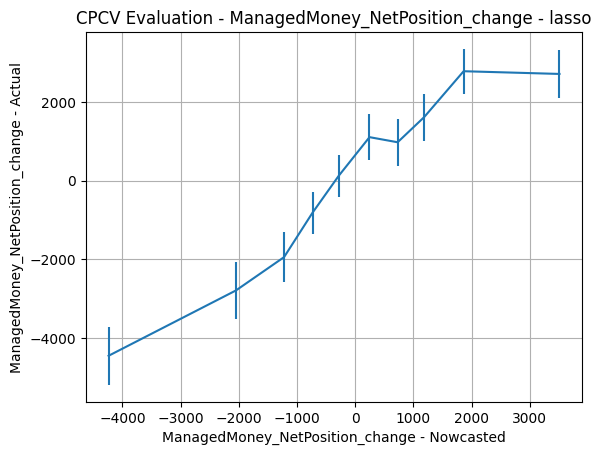

ridge: score=0.3474, params={'model': 'ridge', 'alpha': 968.0937508971867}
{'alpha': 968.0937508971867}


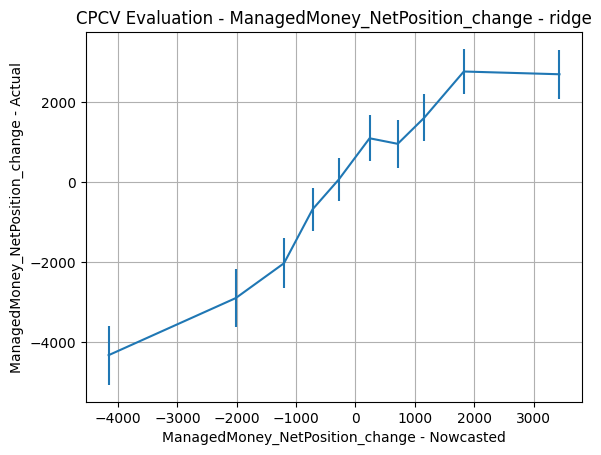

rf: score=0.3865, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}


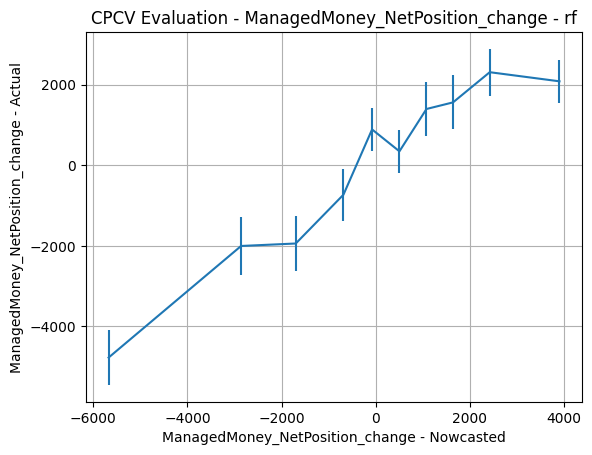

hgbm: score=0.3226, params={'model': 'hgbm', 'learning_rate': 0.2700099884412453, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.31214445474944374, 'max_leaf_nodes': 181}
{'learning_rate': 0.2700099884412453, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.31214445474944374, 'max_leaf_nodes': 181}


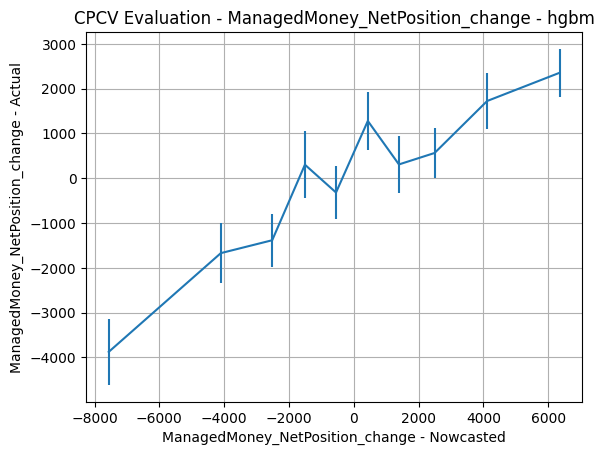

ols: score=0.3492, params={'model': 'ols'}
{}


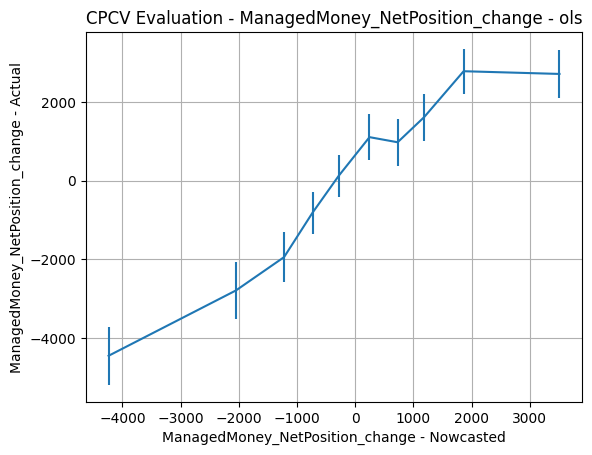

enet: score=0.2936, params={'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}
{'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}


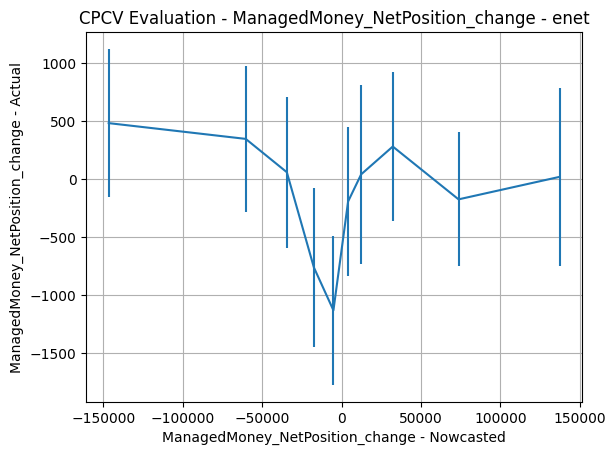

extra: score=0.4009, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}


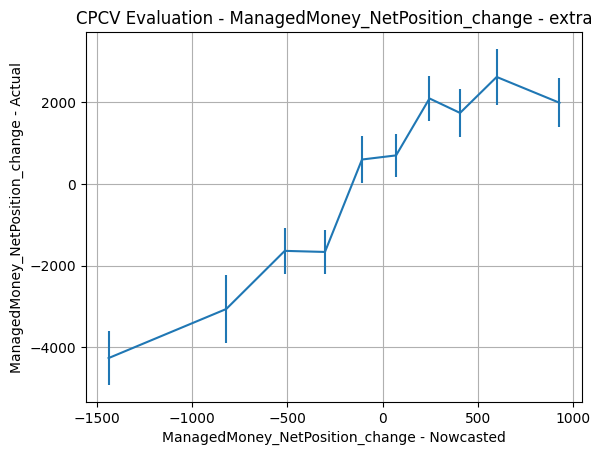

ManagedMoney_LongPosition_change
lasso: score=0.4937, params={'model': 'lasso', 'alpha': 6.12680484014336}
{'alpha': 6.12680484014336}


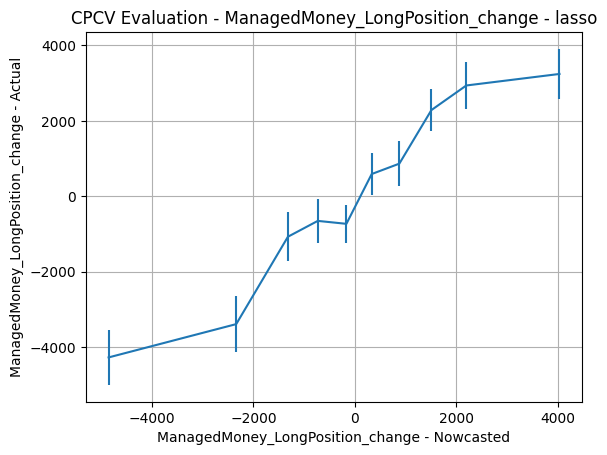

ridge: score=0.4937, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


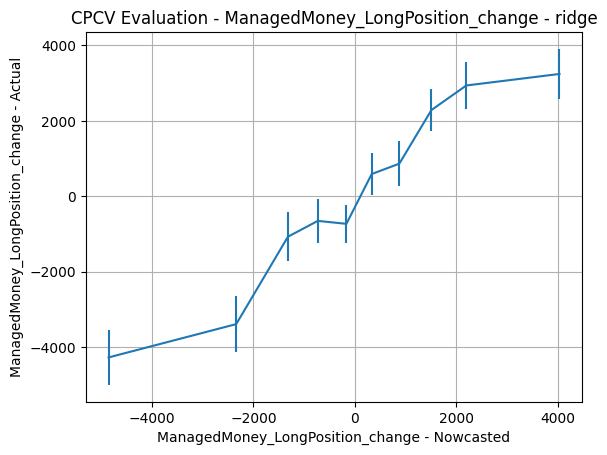

rf: score=0.5172, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}


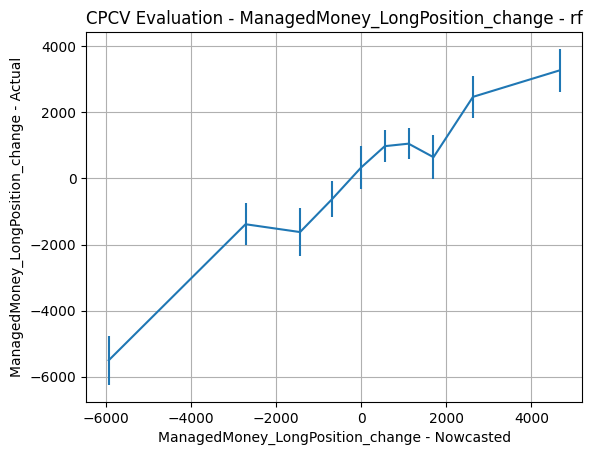

hgbm: score=0.4335, params={'model': 'hgbm', 'learning_rate': 0.2578113394310142, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.7345798081017254, 'max_leaf_nodes': 168}
{'learning_rate': 0.2578113394310142, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.7345798081017254, 'max_leaf_nodes': 168}


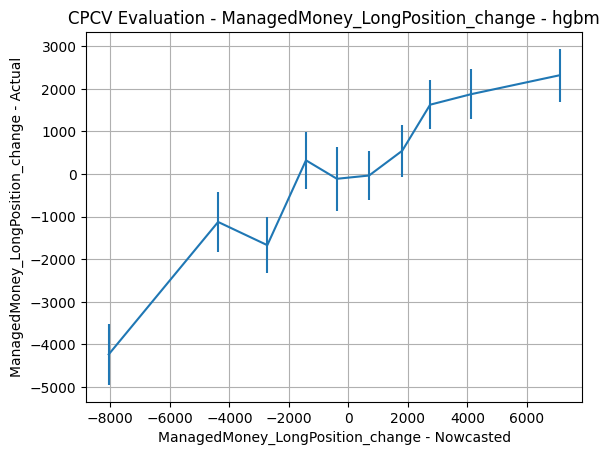

ols: score=0.4937, params={'model': 'ols'}
{}


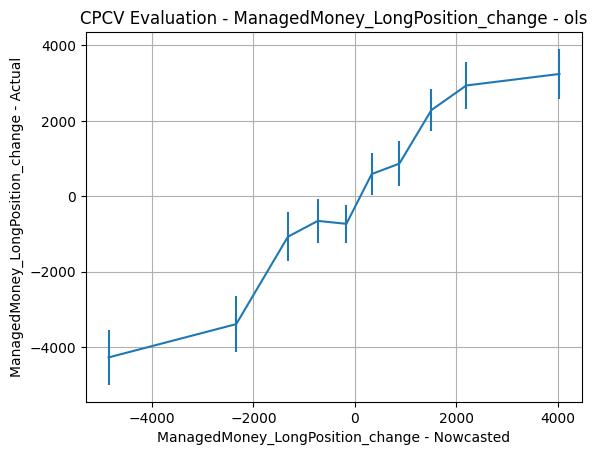

enet: score=0.4270, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


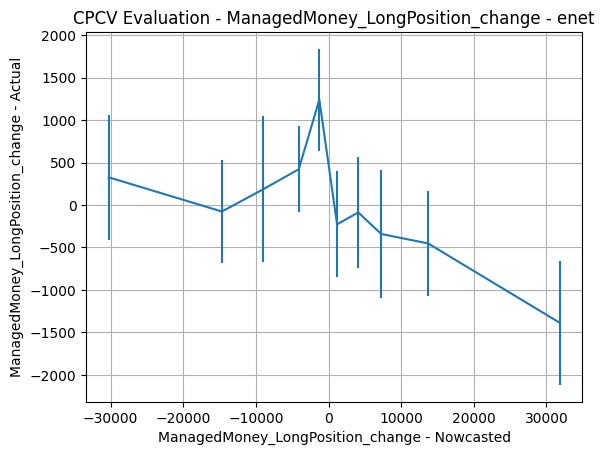

extra: score=0.5069, params={'model': 'extra', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}


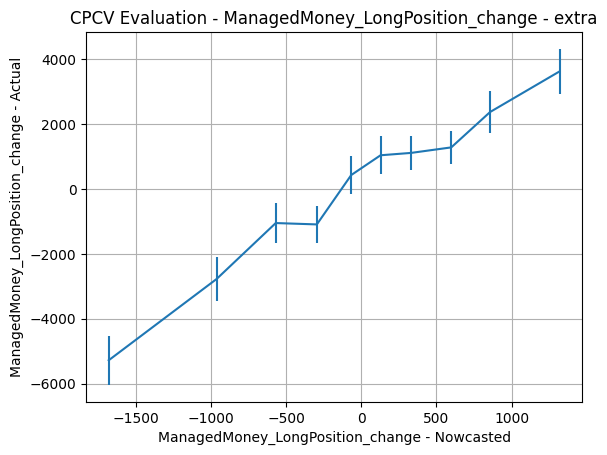

ManagedMoney_ShortPosition_change
lasso: score=0.2526, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
{'alpha': 6.853298554875743e-05}


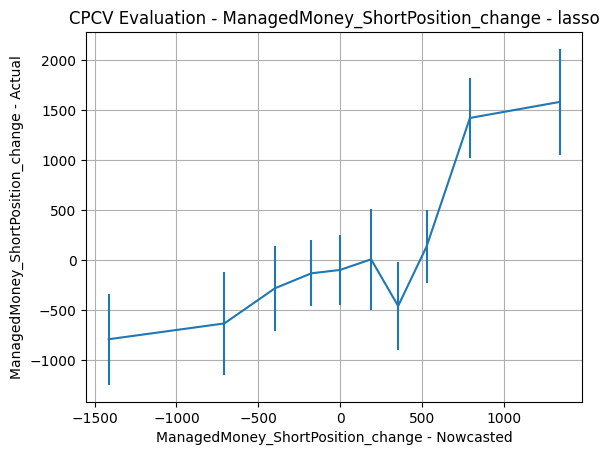

ridge: score=0.2510, params={'model': 'ridge', 'alpha': 583.9795398889747}
{'alpha': 583.9795398889747}


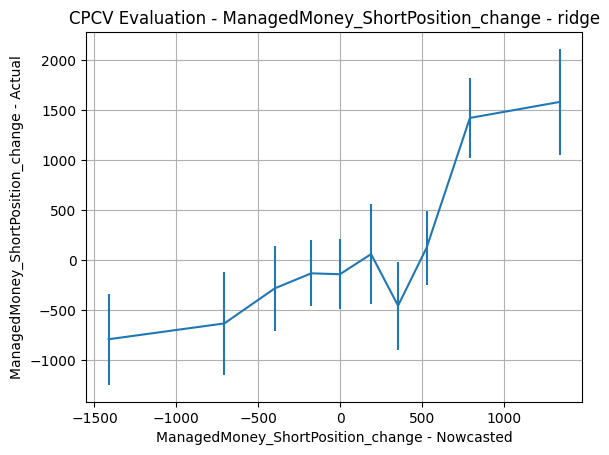

rf: score=0.2306, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


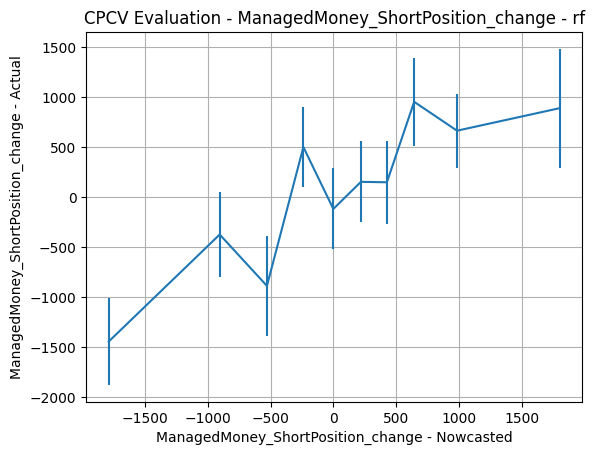

hgbm: score=0.1840, params={'model': 'hgbm', 'learning_rate': 0.2987653543282141, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.5772662236272488, 'max_leaf_nodes': 255}
{'learning_rate': 0.2987653543282141, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.5772662236272488, 'max_leaf_nodes': 255}


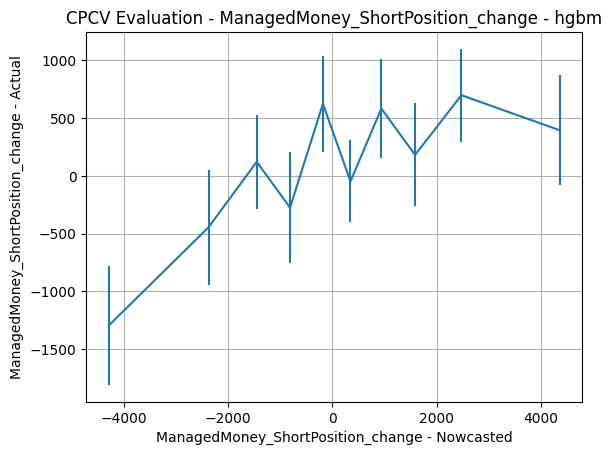

ols: score=0.2526, params={'model': 'ols'}
{}


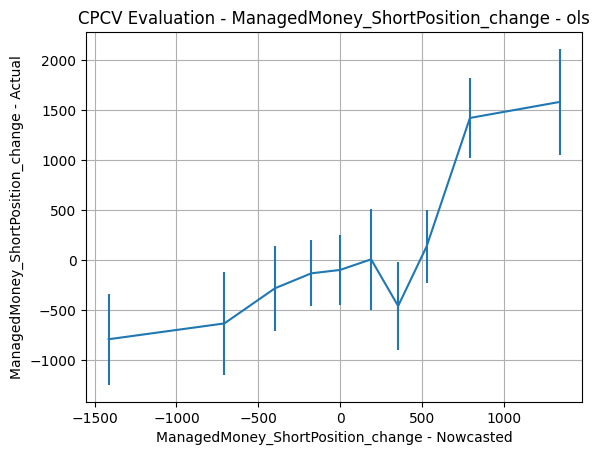

enet: score=0.0081, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


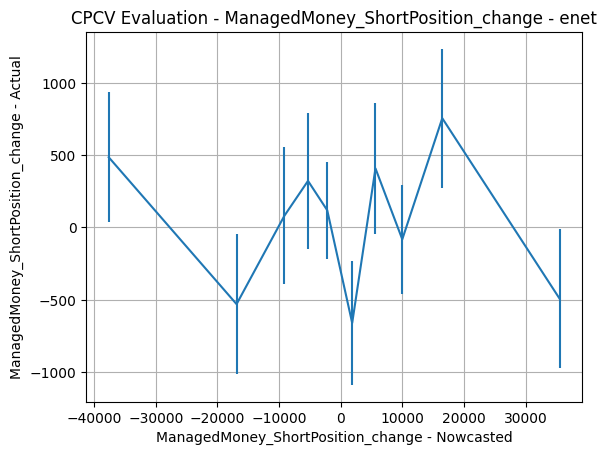

extra: score=0.2196, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


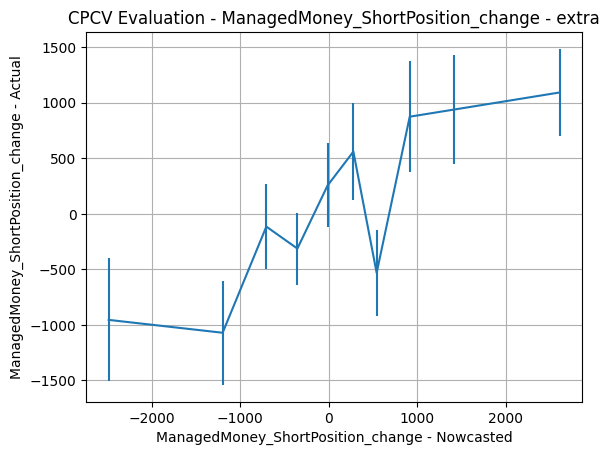

ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0309, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


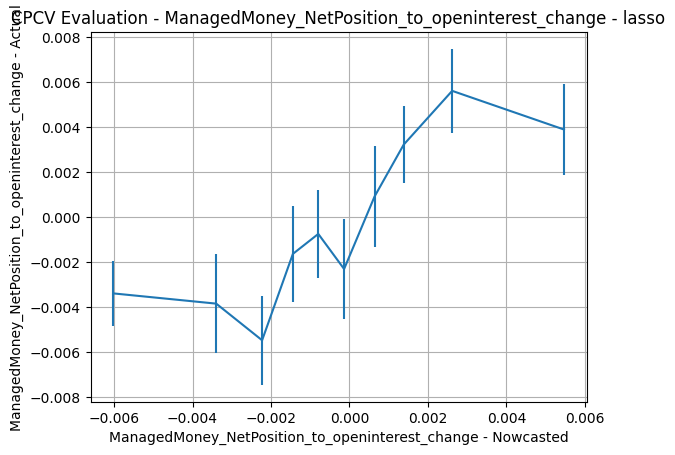

ridge: score=0.3888, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


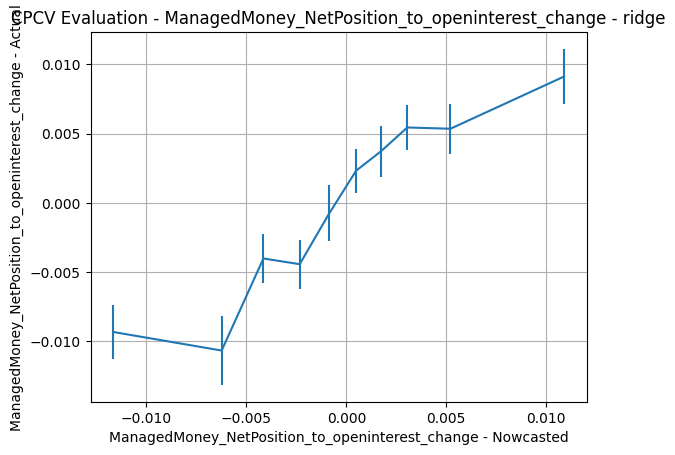

rf: score=0.3578, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 1, 'max_features': 'log2'}


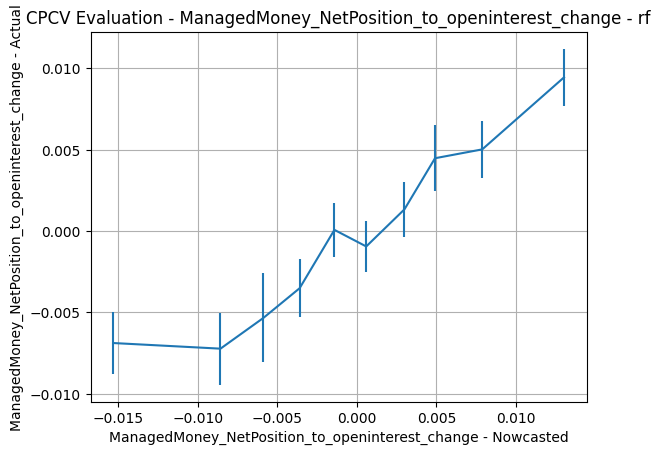

hgbm: score=0.2691, params={'model': 'hgbm', 'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.019985647988915334, 'max_leaf_nodes': 191}
{'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.019985647988915334, 'max_leaf_nodes': 191}


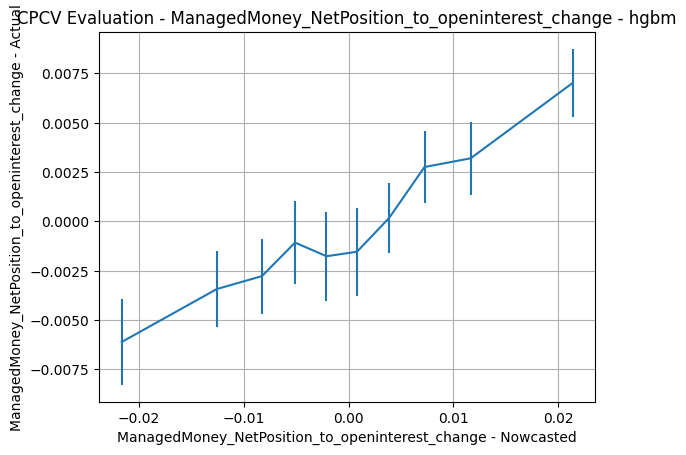

ols: score=0.3896, params={'model': 'ols'}
{}


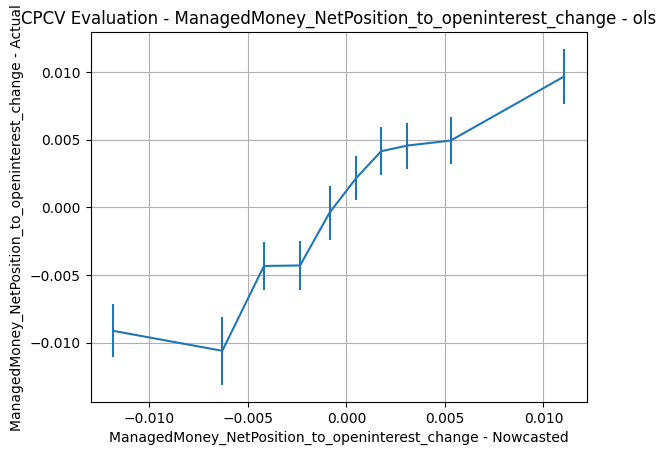

enet: score=0.0849, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


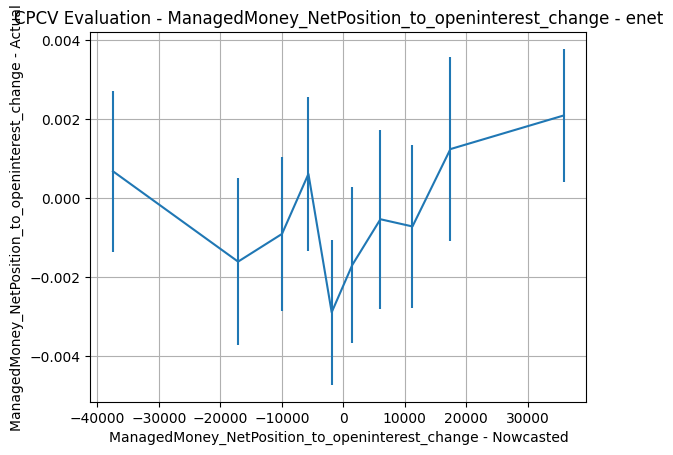

extra: score=0.3899, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}


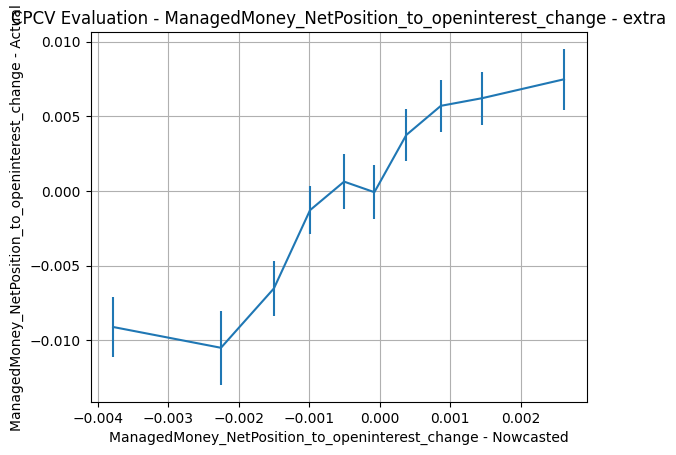

ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0210, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


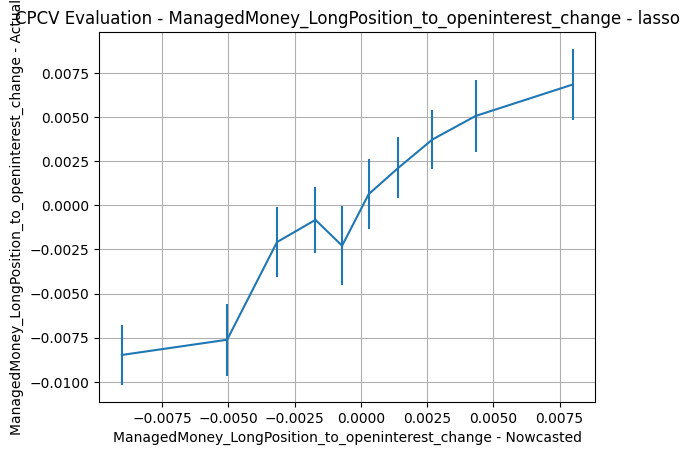

ridge: score=0.5121, params={'model': 'ridge', 'alpha': 987.9192474391184}
{'alpha': 987.9192474391184}


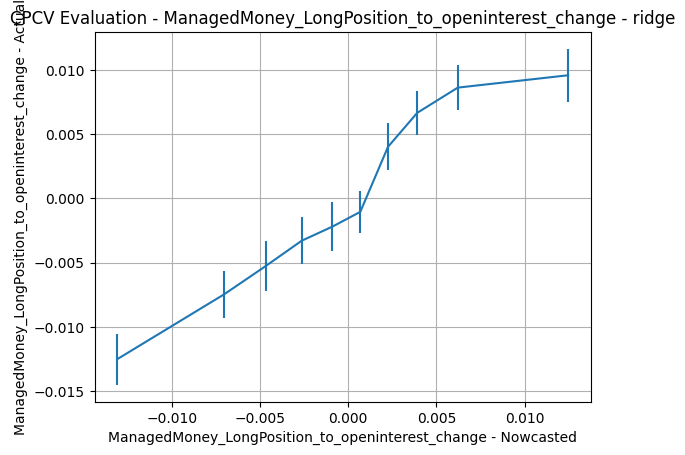

rf: score=0.5186, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}


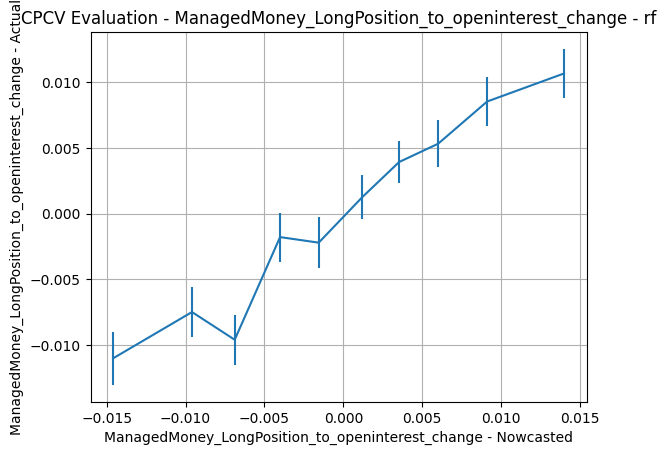

hgbm: score=0.5028, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


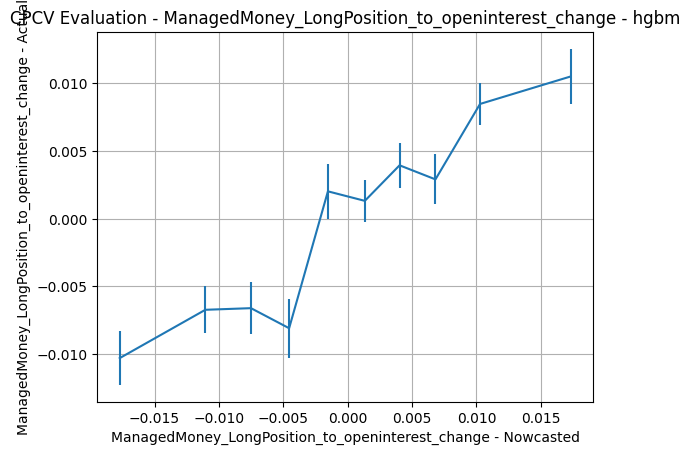

ols: score=0.5168, params={'model': 'ols'}
{}


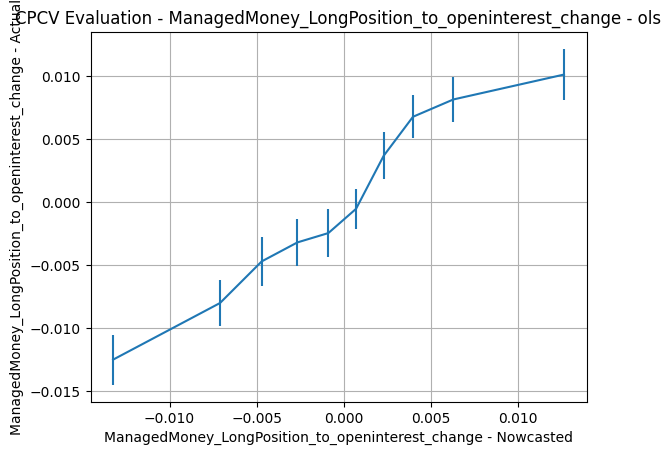

enet: score=0.3481, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


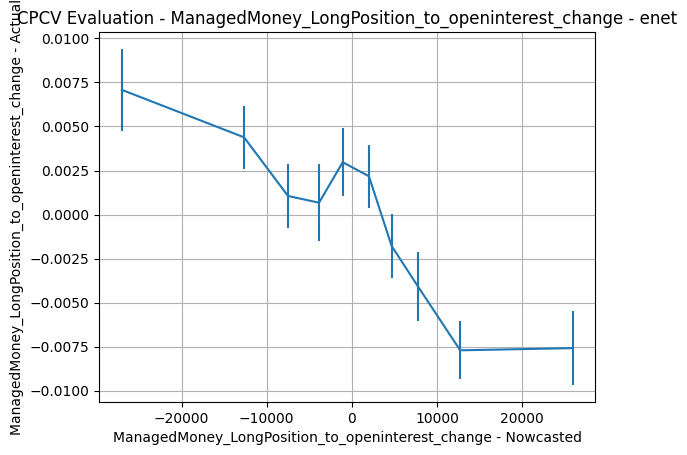

extra: score=0.4916, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


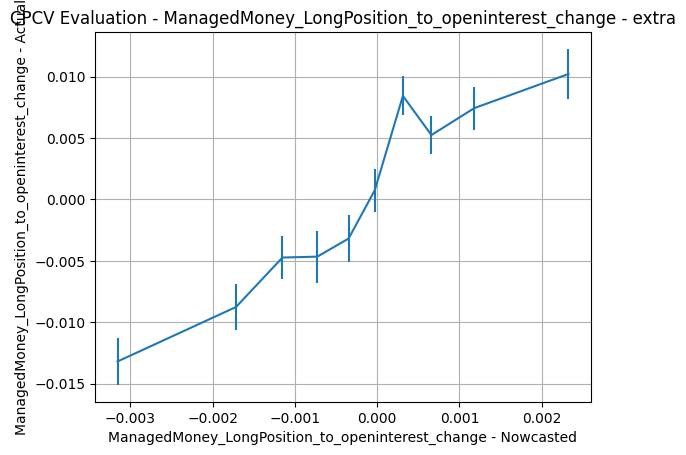

ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0601, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


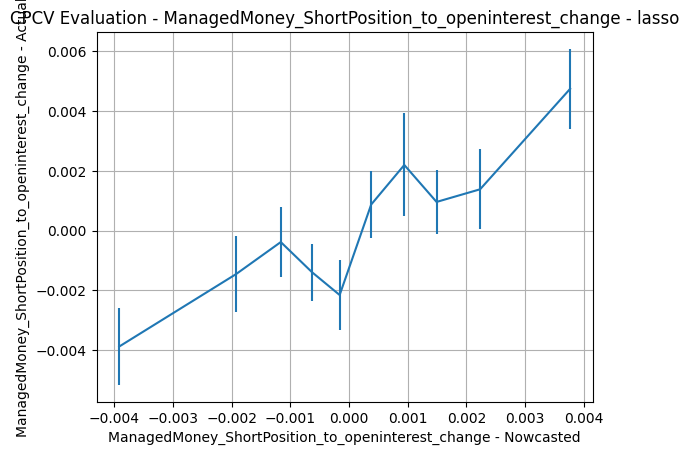

ridge: score=0.1583, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


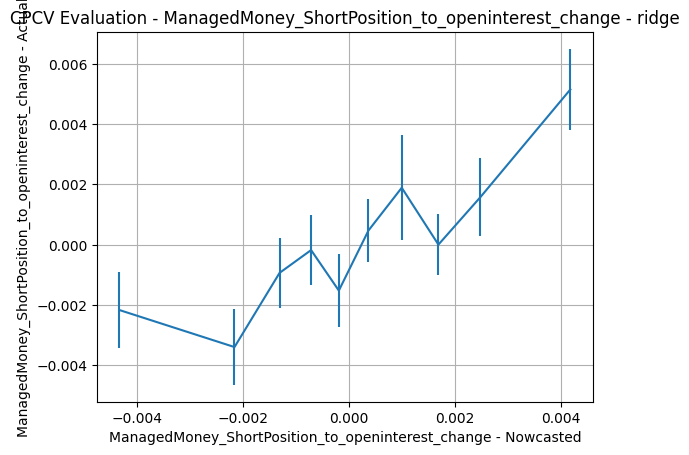

rf: score=0.2249, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


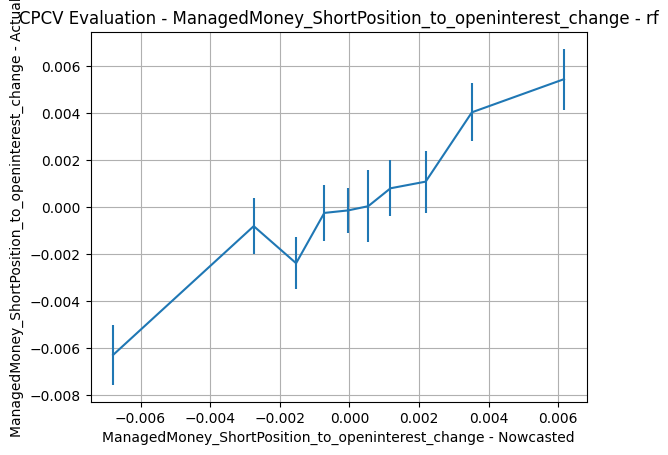

hgbm: score=0.1740, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


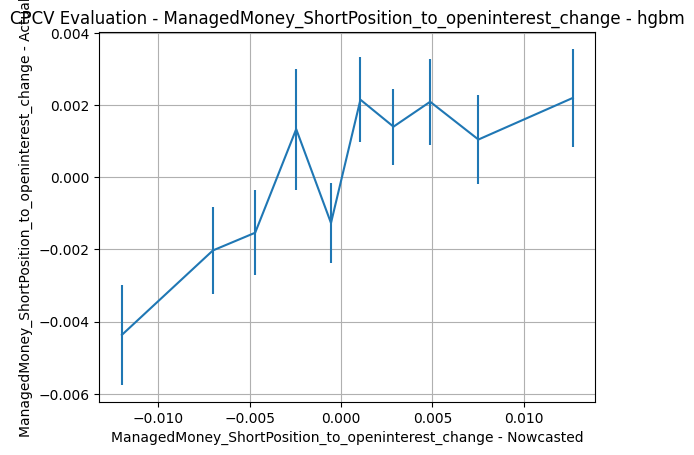

ols: score=0.1672, params={'model': 'ols'}
{}


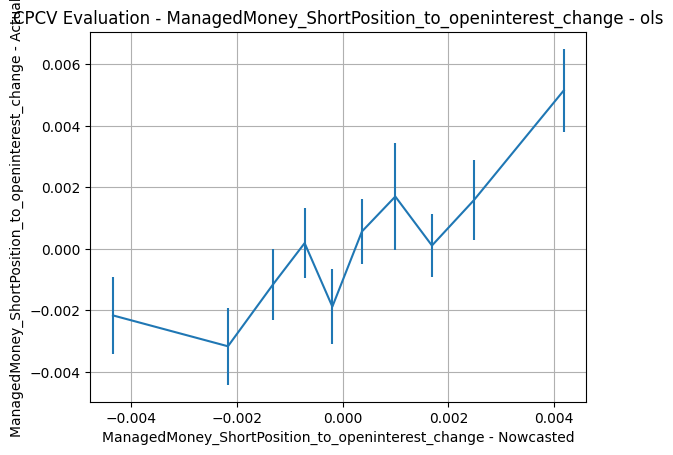

enet: score=-0.0487, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


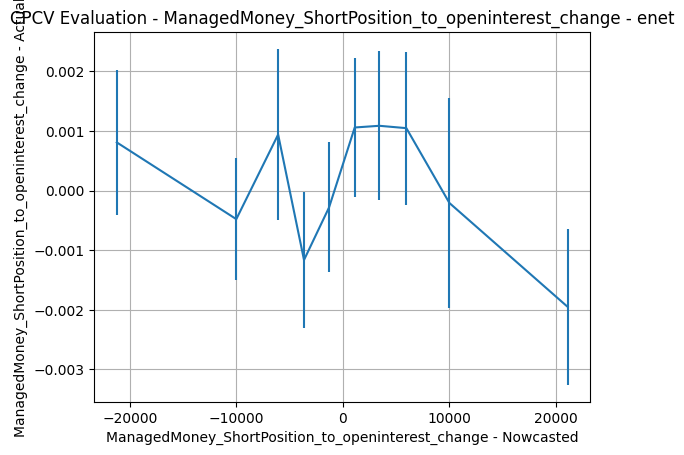

extra: score=0.2216, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


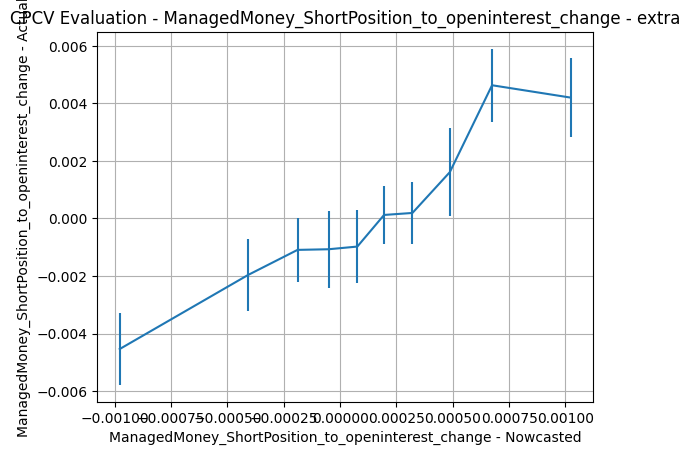

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
ManagedMoney_NetPosition_change,0.319937,0.319957,0.345266,0.260388,0.319937,-0.011487,0.364770
ManagedMoney_LongPosition_change,0.365069,0.365075,0.398149,0.298047,0.365075,-0.067737,0.406965
ManagedMoney_ShortPosition_change,0.123886,0.124110,0.156979,0.128285,0.123886,0.019155,0.119862
ManagedMoney_NetPosition_to_openinterest_change,0.146038,0.304478,0.274512,0.192607,0.304356,0.036958,0.321088
ManagedMoney_LongPosition_to_openinterest_change,0.253853,0.368891,0.398604,0.358572,0.368719,-0.236449,0.380129
ManagedMoney_ShortPosition_to_openinterest_change,0.180878,0.167519,0.227237,0.173984,0.167162,-0.027771,0.221378


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_per_response

{'ManagedMoney_NetPosition_change': 'extra',
 'ManagedMoney_LongPosition_change': 'extra',
 'ManagedMoney_ShortPosition_change': 'rf',
 'ManagedMoney_NetPosition_to_openinterest_change': 'extra',
 'ManagedMoney_LongPosition_to_openinterest_change': 'rf',
 'ManagedMoney_ShortPosition_to_openinterest_change': 'rf'}

In [40]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

ManagedMoney_NetPosition_change
{'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}
ManagedMoney_LongPosition_change
{'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}
ManagedMoney_ShortPosition_change
{'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
ManagedMoney_LongPosition_to_openinterest_change
{'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}
ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [41]:
final_selected_model_and_parameters_per_response

{'ManagedMoney_NetPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 1000,
   'max_depth': 26,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 400,
   'max_depth': 22,
   'min_samples_leaf': 8,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 27,
   'min_samples_leaf': 10,
   'max_features': 'sqrt'}},
 'ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1000,
   'max_depth': 22,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 15,
   'min_samples_leaf': 3,
   'max_features': 'log2'}},
 'ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 400,
   'max_dep

In [42]:
import json
with open("rbob_cot_mm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)